#  Анализ оттока клиентов. Банки

*Описание проекта:*  От отдела маркетинга "Метанпромбанка" поступил заказ: требуется провести анализ отточных клиентов максимально точно для их удержания. Выявить их основные черты и особенности. Заказчик - маркетолог "Метанпромбанка".

*Цель проекта:* Составить портрет отточного клиента банка и предоставить рекомендации для оттдела маркетинга "Метанпромбанка".

*Задачи:* Анализ оттока клиенови сегментирование пользователей банка.

*Ход работы:*

1. Предобработка данных:

  1.1 Загрузка данных

  1.2 Изучение типов данных
  
  1.3 Форматирование данных, приведение  к стандартному виду
  
  1.4 Анализ дубликатов
  
  1.5 Анализ пропусков
  
  1.6 Кодирование данных для дальнейшего анализа
  

2. Исследовательский анализ данных:

  2.1 Статистический анализ
Определение основных статистических характеристик: Вычислить среднее, медиану, моду и стандартное отклонение для всех непрерывных переменных в данных.

Анализ распределения характеристик в разрезе оттока: Для каждой непрерывной переменной провести отдельный анализ, чтобы понять, как эти характеристики распределены среди клиентов с различным уровнем оттока.

   2.2 Визуализация данных
Гистограммы или KDE-графики: Построить для непрерывных переменных, чтобы визуализировать распределение этих переменных среди клиентов с различным уровнем оттока.

Столбчатые диаграммы: Для категориальных переменных, чтобы показать долю оттока в каждой категории. Если анализируются продукты, построить тепловую карту, чтобы показать долю использования продуктов в каждой категории.

   2.3 Сравнение уровней оттока клиентов по категориям
Анализ количественных портретов клиентов: Вычислить средние значения каждой характеристики для отточных и неотточных клиентов. Определить, насколько процентов средние значения различаются между этими группами.

   2.4 Провести корреляционный анализ
Анализ корреляции: Провести корреляционный анализ между переменными, особенно между характеристиками клиентов и уровнем оттока. Это поможет определить, какие переменные сильно связаны с оттоком клиентов.
  

3. Проверка статистических гипотез:

  3.1 Формулирование гипотез. 

  3.2 Тестирование гипотез.
  

4. Сегментация на основе стратегических пользователей:

  4.1 Анализ сегментов. Определите ключевые характеристики каждого сегмента и причины, по которым клиенты этого сегмента могут покидать банк.
  

5. Вывод и рекомендации:

  5.1 Составление портрета отточного клиента

  5.2 Рекомендации для отдела маркетинга
  

6. Презентация результатов:

  6.1 Подготовка отчета.

  6.2 Презентация.

## Предобработка данных

### Загрузка данных

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [2]:
url = 'https://disk.yandex.ru/d/kwEomcCG5-gugg'

download_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?public_key=' + url
response = requests.get(download_url)
download_link = response.json()['href']

response = requests.get(download_link)

with open('temp_file.csv', 'wb') as f:
    f.write(response.content)

banks = pd.read_csv('temp_file.csv')

### Изучение типов данных

Выводим первые несколько строк данных и изучим общую информацию о датафрейме

In [3]:
display(banks.head())
print('\n')
print(banks.shape)
print('\n')
print(banks.info())

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1




(10000, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
None


В данном датафрейме 10000 строк и 12 колонок. Следует на начальном этапе привести все названия столбцов к стандартному виду. В таблице присутствуют пропуски в столбцах age и balance. Стоит внимательно посмотреть на них далее.  По типам данных float64(4), int64(6), object(5).

### Форматирование данных, приведение к стандартному виду

Приведем названия столбцов к стандартному виду

In [4]:
banks.columns = banks.columns.str.lower()
banks.rename(columns={'userid': 'user_id'}, inplace=True)
print(banks.columns)

Index(['user_id', 'score', 'city', 'gender', 'age', 'equity', 'balance',
       'products', 'credit_card', 'last_activity', 'est_salary', 'churn'],
      dtype='object')


Далее хочется привести столбцы age и score к целочисленному виду. Так как в столбце age присутствуют пропуски сделаю это после их обработки.

In [5]:
banks['score'].unique()

array([ 850.,  861.,  892.,  866.,  730.,  856.,  807.,  825.,  923.,
        906.,  927.,  921.,  845.,  837.,  815.,  731.,  829.,  793.,
        876.,  922.,  772.,  896.,  871.,  732.,  898.,  806.,  766.,
        776.,  868.,  946.,  828.,  786.,  944.,  863.,  822.,  794.,
        924.,  811.,  814.,  956.,  935.,  826.,  849.,  901.,  893.,
        792.,  888.,  831.,  748.,  820.,  860.,  914.,  930.,  948.,
        789.,  737.,  812.,  933.,  809.,  749.,  873.,  859.,  950.,
        937.,  835.,  768.,  767.,  785.,  846.,  750.,  816.,  894.,
        891.,  788.,  758.,  787.,  821.,  855.,  779.,  791.,  838.,
        971.,  797.,  841.,  915.,  985.,  870.,  897.,  763.,  774.,
        686., 1000.,  875.,  819.,  869.,  854.,  810.,  761.,  802.,
        958.,  917.,  745.,  736.,  908.,  928.,  884.,  853.,  780.,
        726.,  881.,  975.,  852.,  965.,  899.,  890.,  836.,  818.,
        880.,  795.,  916.,  775.,  902.,  918.,  842.,  771.,  895.,
        801.,  721.,

In [6]:
banks['score'] = banks['score'].astype(int)

In [7]:
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  int64  
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 937.6+ KB
None


На данном этапе я заменила тип данных в столбеце score на int и привела наименования столбцов к стандартному виду. Далее рассмотрим уникальные значиния количества продуктов у клиентов.

In [8]:
print(banks['products'].value_counts())

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64


В нашем датасете есть одна строка с 0 продуктов. Такое может быть, если в данных закралась ошибка и, например, ушедшего клиента, закрывшего все продукты не удалили из базы. Удалим эту строку

In [9]:
banks = banks[banks['products'] != 0]

In [10]:
print(banks['products'].value_counts())

2    5126
1    3341
3    1039
4     474
5      19
Name: products, dtype: int64


### Анализ дубликатов

Для начала посмотрим есть ли в таблице явные дубликаты

In [11]:
print("Явные дубликаты:")
display(banks.duplicated().sum())

Явные дубликаты:


0

Явные дубликаты отсутствуют. Проверим не явные. Судя по нашим данным, стоит обратить внимание на столбец userid, так как остальные значения могут повторяться.

In [12]:
implicit_duplicates = banks.duplicated(subset=['user_id'], keep=False)
print("\nНеявные дубликаты:")
display(banks[implicit_duplicates])


Неявные дубликаты:


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7,218868,825,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
58,164676,860,Ярославль,М,37.0,5,648594.03,2,1,1,213586.86,1
150,185748,850,Рыбинск,М,36.0,5,1203376.67,2,0,1,89401.82,1
161,197364,928,Рыбинск,Ж,53.0,6,1347183.86,2,0,1,168189.49,1
231,190253,823,Рыбинск,М,37.0,4,373348.39,2,0,1,131947.92,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9775,124450,758,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0
9785,168998,895,Рыбинск,М,44.0,0,282653.53,3,0,0,255296.47,0
9819,140934,832,Рыбинск,Ж,NaN,3,385763.16,2,0,1,59651.35,0
9880,217412,886,Ярославль,Ж,35.0,3,1026172.14,2,1,0,53099.16,0


Можно заметить, что по user_id в датасете присутствует большое количество дубликатов 146. Стоит их рассмотреть попарно, что бы оценить их значимость.

In [13]:
duplicates = banks.groupby('user_id').filter(lambda x: len(x) > 1)

print("\nДубликаты попарно:")
for user_id, group in duplicates.groupby('user_id'):
    if len(group) > 1:
        print(f"Дубликаты для user_id {user_id}:")
        for i, row in group.iterrows():
            display(row)
            print()


Дубликаты попарно:
Дубликаты для user_id 116540:


user_id             116540
score                  883
city               Рыбинск
gender                   Ж
age                   55.0
equity                   1
balance          362756.49
products                 3
credit_card              0
last_activity            1
est_salary       175920.48
churn                    1
Name: 1893, dtype: object

user_id             116540
score                  887
city             Ярославль
gender                   Ж
age                   38.0
equity                   0
balance                NaN
products                 1
credit_card              0
last_activity            1
est_salary       119247.61
churn                    0
Name: 7694, dtype: object


Дубликаты для user_id 117943:


user_id              117943
score                   855
city                Рыбинск
gender                    Ж
age                    32.0
equity                    6
balance          1036832.93
products                  4
credit_card               1
last_activity             1
est_salary        107792.71
churn                     1
Name: 4866, dtype: object

user_id             117943
score                  880
city             Ярославль
gender                   Ж
age                   40.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       137718.93
churn                    0
Name: 7542, dtype: object


Дубликаты для user_id 120258:


user_id              120258
score                   908
city                Рыбинск
gender                    Ж
age                    38.0
equity                    4
balance          2213581.63
products                  2
credit_card               0
last_activity             1
est_salary        160327.77
churn                     1
Name: 5863, dtype: object

user_id             120258
score                  905
city             Ярославль
gender                   М
age                   30.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       146427.96
churn                    0
Name: 5896, dtype: object


Дубликаты для user_id 123461:


user_id             123461
score                  829
city             Ярославль
gender                   Ж
age                   59.0
equity                   0
balance           96222.44
products                 2
credit_card              0
last_activity            1
est_salary       102771.55
churn                    1
Name: 1411, dtype: object

user_id             123461
score                  934
city               Рыбинск
gender                   М
age                   34.0
equity                   0
balance                NaN
products                 2
credit_card              1
last_activity            0
est_salary       291619.27
churn                    0
Name: 8638, dtype: object


Дубликаты для user_id 124450:


user_id             124450
score                  859
city             Ярославль
gender                   Ж
age                   38.0
equity                   6
balance           516811.2
products                 1
credit_card              1
last_activity            1
est_salary        95144.63
churn                    1
Name: 8164, dtype: object

user_id            124450
score                 758
city              Рыбинск
gender                  Ж
age                  36.0
equity                  0
balance          73574.07
products                2
credit_card             0
last_activity           1
est_salary       79963.59
churn                   0
Name: 9775, dtype: object


Дубликаты для user_id 126368:


user_id              126368
score                   909
city              Ярославль
gender                    Ж
age                    30.0
equity                    4
balance          1322623.29
products                  2
credit_card               0
last_activity             1
est_salary        140675.66
churn                     1
Name: 4850, dtype: object

user_id             126368
score                  832
city               Рыбинск
gender                   Ж
age                   33.0
equity                   0
balance                NaN
products                 1
credit_card              0
last_activity            0
est_salary       118465.34
churn                    0
Name: 5420, dtype: object


Дубликаты для user_id 127440:


user_id            127440
score                 846
city              Рыбинск
gender                  М
age                  66.0
equity                  1
balance          57405.67
products                2
credit_card             0
last_activity           1
est_salary       17831.63
churn                   0
Name: 4443, dtype: object

user_id             127440
score                  663
city             Ярославль
gender                   М
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       117197.56
churn                    0
Name: 8785, dtype: object


Дубликаты для user_id 129785:


user_id             129785
score                  904
city               Рыбинск
gender                   М
age                   33.0
equity                   5
balance          2427737.6
products                 3
credit_card              0
last_activity            1
est_salary       188856.75
churn                    1
Name: 3988, dtype: object

user_id             129785
score                  949
city             Ярославль
gender                   М
age                   43.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       166845.37
churn                    0
Name: 9504, dtype: object


Дубликаты для user_id 131419:


user_id              131419
score                   934
city              Ярославль
gender                    М
age                    35.0
equity                    5
balance          2348335.95
products                  2
credit_card               0
last_activity             0
est_salary        217105.13
churn                     1
Name: 904, dtype: object

user_id              131419
score                   739
city                Рыбинск
gender                    Ж
age                    37.0
equity                    3
balance          1307941.65
products                  3
credit_card               0
last_activity             0
est_salary        103867.47
churn                     0
Name: 2138, dtype: object


Дубликаты для user_id 140377:


user_id             140377
score                  802
city             Ярославль
gender                   М
age                   26.0
equity                   3
balance          539863.29
products                 4
credit_card              1
last_activity            1
est_salary       112167.83
churn                    1
Name: 1608, dtype: object

user_id              140377
score                   930
city                Рыбинск
gender                    Ж
age                    34.0
equity                    5
balance          1123967.02
products                  1
credit_card               1
last_activity             1
est_salary        148336.26
churn                     0
Name: 7487, dtype: object


Дубликаты для user_id 140934:


user_id             140934
score                  919
city             Ярославль
gender                   Ж
age                   29.0
equity                   4
balance          603946.18
products                 3
credit_card              0
last_activity            1
est_salary       158438.79
churn                    0
Name: 4212, dtype: object

user_id             140934
score                  832
city               Рыбинск
gender                   Ж
age                    NaN
equity                   3
balance          385763.16
products                 2
credit_card              0
last_activity            1
est_salary        59651.35
churn                    0
Name: 9819, dtype: object


Дубликаты для user_id 141265:


user_id             141265
score                  858
city             Ярославль
gender                   М
age                   37.0
equity                   4
balance          471599.16
products                 2
credit_card              1
last_activity            1
est_salary       148806.88
churn                    1
Name: 2276, dtype: object

user_id              141265
score                   811
city                Рыбинск
gender                    Ж
age                    33.0
equity                    3
balance          1044316.88
products                  2
credit_card               1
last_activity             0
est_salary         46055.32
churn                     0
Name: 5569, dtype: object


Дубликаты для user_id 141945:


user_id             141945
score                  929
city               Рыбинск
gender                   М
age                   33.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       381868.89
churn                    0
Name: 4343, dtype: object

user_id             141945
score                  929
city             Ярославль
gender                   М
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       381868.89
churn                    0
Name: 9457, dtype: object


Дубликаты для user_id 143592:


user_id              143592
score                   885
city                Рыбинск
gender                    Ж
age                    56.0
equity                    4
balance          1201087.46
products                  2
credit_card               1
last_activity             1
est_salary         88223.89
churn                     1
Name: 5369, dtype: object

user_id             143592
score                  764
city             Ярославль
gender                   Ж
age                   68.0
equity                   3
balance          508919.15
products                 2
credit_card              0
last_activity            1
est_salary        71211.66
churn                    0
Name: 5557, dtype: object


Дубликаты для user_id 148826:


user_id              148826
score                   895
city              Ярославль
gender                    М
age                    32.0
equity                    5
balance          1470273.14
products                  2
credit_card               0
last_activity             0
est_salary        118058.52
churn                     1
Name: 5252, dtype: object

user_id            148826
score                 909
city              Рыбинск
gender                  Ж
age                  32.0
equity                  0
balance               NaN
products                3
credit_card             1
last_activity           0
est_salary       28843.54
churn                   0
Name: 8364, dtype: object


Дубликаты для user_id 149365:


user_id             149365
score                  877
city             Ярославль
gender                   М
age                   41.0
equity                   5
balance          819182.01
products                 2
credit_card              0
last_activity            0
est_salary       212316.47
churn                    1
Name: 946, dtype: object

user_id             149365
score                  793
city               Рыбинск
gender                   Ж
age                   61.0
equity                   0
balance          476496.99
products                 2
credit_card              1
last_activity            1
est_salary        46147.06
churn                    0
Name: 8272, dtype: object


Дубликаты для user_id 150667:


user_id             150667
score                  813
city               Рыбинск
gender                   Ж
age                   44.0
equity                   0
balance           62504.47
products                 4
credit_card              1
last_activity            0
est_salary       152393.79
churn                    1
Name: 2439, dtype: object

user_id             150667
score                  931
city             Ярославль
gender                   М
age                   41.0
equity                   0
balance                NaN
products                 1
credit_card              0
last_activity            0
est_salary       261904.44
churn                    0
Name: 9267, dtype: object


Дубликаты для user_id 151662:


user_id             151662
score                  960
city             Ярославль
gender                   Ж
age                   37.0
equity                   4
balance          2527032.7
products                 4
credit_card              1
last_activity            0
est_salary        231648.5
churn                    0
Name: 3683, dtype: object

user_id             151662
score                  884
city               Рыбинск
gender                   Ж
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       137500.77
churn                    0
Name: 5495, dtype: object


Дубликаты для user_id 152479:


user_id             152479
score                  768
city               Рыбинск
gender                   Ж
age                   42.0
equity                   0
balance          126787.79
products                 4
credit_card              1
last_activity            1
est_salary       143233.23
churn                    1
Name: 690, dtype: object

user_id             152479
score                  723
city             Ярославль
gender                   Ж
age                   22.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary        83955.65
churn                    0
Name: 5705, dtype: object


Дубликаты для user_id 155765:


user_id             155765
score                  863
city             Ярославль
gender                   М
age                   30.0
equity                   5
balance          1036114.5
products                 5
credit_card              1
last_activity            1
est_salary        150744.5
churn                    1
Name: 3274, dtype: object

user_id            155765
score                 923
city              Рыбинск
gender                  М
age                  30.0
equity                  0
balance               NaN
products                1
credit_card             1
last_activity           1
est_salary       120296.6
churn                   0
Name: 5197, dtype: object


Дубликаты для user_id 155872:


user_id              155872
score                   896
city              Ярославль
gender                    М
age                    36.0
equity                    3
balance          1113656.92
products                  3
credit_card               0
last_activity             1
est_salary        291176.85
churn                     1
Name: 1080, dtype: object

user_id             155872
score                  714
city               Рыбинск
gender                   Ж
age                   29.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       118052.84
churn                    0
Name: 9363, dtype: object


Дубликаты для user_id 160075:


user_id              160075
score                   899
city              Ярославль
gender                    М
age                    34.0
equity                    4
balance          1647814.67
products                  4
credit_card               1
last_activity             0
est_salary        151888.42
churn                     1
Name: 3936, dtype: object

user_id             160075
score                  824
city               Рыбинск
gender                   Ж
age                   57.0
equity                   3
balance          355047.33
products                 2
credit_card              0
last_activity            0
est_salary        64351.81
churn                    0
Name: 9508, dtype: object


Дубликаты для user_id 162053:


user_id             162053
score                  921
city               Рыбинск
gender                   М
age                   33.0
equity                   3
balance          857011.13
products                 2
credit_card              1
last_activity            1
est_salary       113512.57
churn                    1
Name: 5629, dtype: object

user_id             162053
score                  786
city             Ярославль
gender                   М
age                   29.0
equity                   4
balance          205824.97
products                 3
credit_card              1
last_activity            0
est_salary       121371.73
churn                    0
Name: 8733, dtype: object


Дубликаты для user_id 163207:


user_id             163207
score                  853
city               Рыбинск
gender                   М
age                   42.0
equity                   4
balance          543839.62
products                 1
credit_card              1
last_activity            1
est_salary       105281.97
churn                    1
Name: 3564, dtype: object

user_id             163207
score                  838
city             Ярославль
gender                   Ж
age                   42.0
equity                   4
balance           652776.6
products                 2
credit_card              1
last_activity            1
est_salary        97545.36
churn                    0
Name: 6786, dtype: object


Дубликаты для user_id 163657:


user_id             163657
score                  903
city               Рыбинск
gender                   М
age                   45.0
equity                   4
balance          1343339.7
products                 4
credit_card              0
last_activity            1
est_salary        83741.65
churn                    0
Name: 6670, dtype: object

user_id              163657
score                   849
city              Ярославль
gender                    М
age                     NaN
equity                    4
balance          1254013.85
products                  2
credit_card               1
last_activity             1
est_salary        119106.67
churn                     0
Name: 9667, dtype: object


Дубликаты для user_id 164676:


user_id             164676
score                  860
city             Ярославль
gender                   М
age                   37.0
equity                   5
balance          648594.03
products                 2
credit_card              1
last_activity            1
est_salary       213586.86
churn                    1
Name: 58, dtype: object

user_id             164676
score                  790
city               Рыбинск
gender                   Ж
age                   77.0
equity                   1
balance          111202.01
products                 1
credit_card              1
last_activity            0
est_salary        32835.45
churn                    0
Name: 7271, dtype: object


Дубликаты для user_id 168998:


user_id             168998
score                  886
city             Ярославль
gender                   Ж
age                   35.0
equity                   4
balance          394780.61
products                 2
credit_card              1
last_activity            1
est_salary        510577.1
churn                    1
Name: 5020, dtype: object

user_id             168998
score                  895
city               Рыбинск
gender                   М
age                   44.0
equity                   0
balance          282653.53
products                 3
credit_card              0
last_activity            0
est_salary       255296.47
churn                    0
Name: 9785, dtype: object


Дубликаты для user_id 170312:


user_id              170312
score                   901
city              Ярославль
gender                    М
age                    33.0
equity                    4
balance          3276783.93
products                  3
credit_card               0
last_activity             1
est_salary        358700.96
churn                     1
Name: 790, dtype: object

user_id             170312
score                  813
city               Рыбинск
gender                   Ж
age                   47.0
equity                   3
balance          370027.67
products                 2
credit_card              0
last_activity            0
est_salary       129835.56
churn                    0
Name: 3039, dtype: object


Дубликаты для user_id 171751:


user_id             171751
score                  874
city               Рыбинск
gender                   Ж
age                   26.0
equity                   5
balance          292054.42
products                 2
credit_card              0
last_activity            1
est_salary        20528.56
churn                    1
Name: 4587, dtype: object

user_id             171751
score                  862
city             Ярославль
gender                   М
age                   42.0
equity                   4
balance          481992.19
products                 2
credit_card              1
last_activity            0
est_salary        71816.86
churn                    0
Name: 9653, dtype: object


Дубликаты для user_id 172142:


user_id              172142
score                   896
city              Ярославль
gender                    Ж
age                    30.0
equity                    4
balance          1009073.14
products                  4
credit_card               1
last_activity             0
est_salary         70866.29
churn                     1
Name: 2941, dtype: object

user_id             172142
score                  751
city               Рыбинск
gender                   Ж
age                   69.0
equity                   3
balance          396568.03
products                 2
credit_card              0
last_activity            1
est_salary        45608.45
churn                    0
Name: 6756, dtype: object


Дубликаты для user_id 175730:


user_id             175730
score                  846
city             Ярославль
gender                   Ж
age                   32.0
equity                   7
balance          216764.74
products                 4
credit_card              1
last_activity            1
est_salary        77100.85
churn                    1
Name: 7753, dtype: object

user_id             175730
score                  816
city               Рыбинск
gender                   М
age                   36.0
equity                   4
balance          477892.07
products                 3
credit_card              1
last_activity            0
est_salary         81100.6
churn                    0
Name: 9970, dtype: object


Дубликаты для user_id 181526:


user_id              181526
score                   918
city              Ярославль
gender                    Ж
age                    37.0
equity                    5
balance          1366382.35
products                  4
credit_card               1
last_activity             1
est_salary         97932.95
churn                     1
Name: 2989, dtype: object

user_id             181526
score                  895
city               Рыбинск
gender                   М
age                   29.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       124786.53
churn                    0
Name: 8705, dtype: object


Дубликаты для user_id 183510:


user_id             183510
score                  922
city             Ярославль
gender                   М
age                   26.0
equity                   5
balance          448542.42
products                 3
credit_card              0
last_activity            1
est_salary        66063.13
churn                    1
Name: 8584, dtype: object

user_id             183510
score                  800
city               Рыбинск
gender                   Ж
age                   42.0
equity                   7
balance          473293.81
products                 2
credit_card              1
last_activity            0
est_salary        54049.88
churn                    0
Name: 9146, dtype: object


Дубликаты для user_id 185748:


user_id              185748
score                   850
city                Рыбинск
gender                    М
age                    36.0
equity                    5
balance          1203376.67
products                  2
credit_card               0
last_activity             1
est_salary         89401.82
churn                     1
Name: 150, dtype: object

user_id              185748
score                   912
city              Ярославль
gender                    Ж
age                    47.0
equity                    5
balance          1598218.98
products                  2
credit_card               0
last_activity             0
est_salary        180256.98
churn                     0
Name: 3106, dtype: object


Дубликаты для user_id 185829:


user_id             185829
score                  925
city               Рыбинск
gender                   М
age                   40.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       228305.64
churn                    0
Name: 3668, dtype: object

user_id             185829
score                  927
city             Ярославль
gender                   М
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       231254.86
churn                    0
Name: 9632, dtype: object


Дубликаты для user_id 187459:


user_id             187459
score                  895
city             Ярославль
gender                   М
age                   48.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary        180887.5
churn                    0
Name: 4720, dtype: object

user_id             187459
score                  894
city               Рыбинск
gender                   М
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       178012.28
churn                    0
Name: 9380, dtype: object


Дубликаты для user_id 187635:


user_id             187635
score                  918
city             Ярославль
gender                   Ж
age                   44.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       162497.52
churn                    0
Name: 918, dtype: object

user_id             187635
score                  692
city               Рыбинск
gender                   Ж
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       160368.82
churn                    0
Name: 2165, dtype: object


Дубликаты для user_id 188957:


user_id             188957
score                  853
city             Ярославль
gender                   М
age                   35.0
equity                   1
balance          374959.62
products                 2
credit_card              1
last_activity            1
est_salary       197600.97
churn                    1
Name: 5454, dtype: object

user_id             188957
score                  882
city               Рыбинск
gender                   Ж
age                   64.0
equity                   3
balance          893392.91
products                 3
credit_card              1
last_activity            0
est_salary        69622.58
churn                    0
Name: 6005, dtype: object


Дубликаты для user_id 190253:


user_id             190253
score                  823
city               Рыбинск
gender                   М
age                   37.0
equity                   4
balance          373348.39
products                 2
credit_card              0
last_activity            1
est_salary       131947.92
churn                    1
Name: 231, dtype: object

user_id             190253
score                  726
city             Ярославль
gender                   М
age                   49.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       177700.78
churn                    0
Name: 1583, dtype: object


Дубликаты для user_id 191520:


user_id              191520
score                   773
city                Рыбинск
gender                    М
age                    36.0
equity                    3
balance          1219918.08
products                  4
credit_card               1
last_activity             1
est_salary        119933.13
churn                     1
Name: 3859, dtype: object

user_id             191520
score                  767
city             Ярославль
gender                   М
age                   45.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       880005.05
churn                    0
Name: 7931, dtype: object


Дубликаты для user_id 195884:


user_id              195884
score                   906
city              Ярославль
gender                    М
age                    49.0
equity                    6
balance          1354552.83
products                  2
credit_card               0
last_activity             0
est_salary        270678.42
churn                     1
Name: 2226, dtype: object

user_id             195884
score                  767
city               Рыбинск
gender                   Ж
age                   45.0
equity                   1
balance          335652.56
products                 3
credit_card              1
last_activity            1
est_salary       100197.67
churn                    0
Name: 9659, dtype: object


Дубликаты для user_id 197364:


user_id              197364
score                   928
city                Рыбинск
gender                    Ж
age                    53.0
equity                    6
balance          1347183.86
products                  2
credit_card               0
last_activity             1
est_salary        168189.49
churn                     1
Name: 161, dtype: object

user_id             197364
score                  889
city             Ярославль
gender                   М
age                   33.0
equity                   0
balance                NaN
products                 2
credit_card              1
last_activity            1
est_salary        96173.48
churn                    0
Name: 4870, dtype: object


Дубликаты для user_id 198635:


user_id             198635
score                  896
city               Рыбинск
gender                   Ж
age                   32.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       170866.01
churn                    0
Name: 1181, dtype: object

user_id             198635
score                  670
city             Ярославль
gender                   Ж
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       168699.33
churn                    0
Name: 8015, dtype: object


Дубликаты для user_id 199312:


user_id              199312
score                   948
city              Ярославль
gender                    М
age                    41.0
equity                    5
balance          3095721.85
products                  4
credit_card               1
last_activity             1
est_salary        307234.69
churn                     1
Name: 2499, dtype: object

user_id             199312
score                  911
city               Рыбинск
gender                   Ж
age                   43.0
equity                   0
balance                NaN
products                 2
credit_card              1
last_activity            1
est_salary       152189.72
churn                    0
Name: 8822, dtype: object


Дубликаты для user_id 200863:


user_id             200863
score                  933
city               Рыбинск
gender                   М
age                   29.0
equity                   7
balance          766924.56
products                 2
credit_card              0
last_activity            1
est_salary        89323.33
churn                    1
Name: 9035, dtype: object

user_id             200863
score                  832
city             Ярославль
gender                   М
age                   42.0
equity                   5
balance          620064.73
products                 2
credit_card              0
last_activity            0
est_salary       188054.46
churn                    0
Name: 9175, dtype: object


Дубликаты для user_id 202983:


user_id             202983
score                  941
city             Ярославль
gender                   Ж
age                   39.0
equity                   0
balance                NaN
products                 1
credit_card              0
last_activity            1
est_salary       159348.84
churn                    0
Name: 8897, dtype: object

user_id             202983
score                  942
city               Рыбинск
gender                   Ж
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       163804.73
churn                    0
Name: 9301, dtype: object


Дубликаты для user_id 206759:


user_id             206759
score                  917
city             Ярославль
gender                   М
age                   22.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary        70617.52
churn                    0
Name: 5889, dtype: object

user_id            206759
score                 915
city              Рыбинск
gender                  М
age                   NaN
equity                  0
balance               NaN
products                1
credit_card             1
last_activity           0
est_salary       71179.53
churn                   0
Name: 8385, dtype: object


Дубликаты для user_id 208081:


user_id             208081
score                  873
city             Ярославль
gender                   М
age                   31.0
equity                   2
balance          232814.75
products                 2
credit_card              1
last_activity            1
est_salary       122505.86
churn                    1
Name: 1513, dtype: object

user_id             208081
score                  821
city               Рыбинск
gender                   Ж
age                   62.0
equity                   3
balance          493608.26
products                 2
credit_card              1
last_activity            1
est_salary        33491.45
churn                    0
Name: 2998, dtype: object


Дубликаты для user_id 208738:


user_id             208738
score                  897
city               Рыбинск
gender                   Ж
age                   45.0
equity                   5
balance          859018.19
products                 2
credit_card              1
last_activity            1
est_salary       145510.08
churn                    1
Name: 1580, dtype: object

user_id              208738
score                   839
city              Ярославль
gender                    М
age                    60.0
equity                    5
balance          1102438.37
products                  2
credit_card               0
last_activity             1
est_salary        116500.81
churn                     0
Name: 5840, dtype: object


Дубликаты для user_id 208815:


user_id             208815
score                  877
city               Рыбинск
gender                   М
age                   25.0
equity                   4
balance          239421.18
products                 1
credit_card              1
last_activity            1
est_salary         48638.0
churn                    1
Name: 3350, dtype: object

user_id             208815
score                  773
city             Ярославль
gender                   М
age                   39.0
equity                   4
balance          288110.09
products                 2
credit_card              1
last_activity            0
est_salary        56971.91
churn                    0
Name: 5570, dtype: object


Дубликаты для user_id 210135:


user_id              210135
score                   974
city              Ярославль
gender                    Ж
age                    50.0
equity                    5
balance          5680148.93
products                  4
credit_card               1
last_activity             1
est_salary        338471.66
churn                     0
Name: 3230, dtype: object

user_id              210135
score                   908
city                Рыбинск
gender                    Ж
age                     NaN
equity                    4
balance          1120340.31
products                  3
credit_card               1
last_activity             1
est_salary         85002.15
churn                     0
Name: 7236, dtype: object


Дубликаты для user_id 210627:


user_id              210627
score                   864
city              Ярославль
gender                    Ж
age                    38.0
equity                    4
balance          1527225.32
products                  4
credit_card               1
last_activity             1
est_salary        162999.17
churn                     1
Name: 7453, dtype: object

user_id             210627
score                  804
city               Рыбинск
gender                   М
age                   30.0
equity                   2
balance          347818.88
products                 3
credit_card              1
last_activity            0
est_salary       129015.25
churn                    0
Name: 8521, dtype: object


Дубликаты для user_id 210662:


user_id              210662
score                   962
city              Ярославль
gender                    Ж
age                    54.0
equity                    5
balance          5069231.39
products                  1
credit_card               1
last_activity             1
est_salary        955144.85
churn                     1
Name: 869, dtype: object

user_id            210662
score                 896
city              Рыбинск
gender                  Ж
age                  37.0
equity                  0
balance               NaN
products                2
credit_card             0
last_activity           0
est_salary       90916.04
churn                   0
Name: 1837, dtype: object


Дубликаты для user_id 210792:


user_id             210792
score                  884
city               Рыбинск
gender                   М
age                   48.0
equity                   4
balance          2228037.2
products                 2
credit_card              0
last_activity            1
est_salary       207978.09
churn                    1
Name: 4986, dtype: object

user_id             210792
score                  839
city             Ярославль
gender                   М
age                   42.0
equity                   2
balance          662646.97
products                 1
credit_card              1
last_activity            0
est_salary        138403.6
churn                    0
Name: 7814, dtype: object


Дубликаты для user_id 210898:


user_id             210898
score                  934
city               Рыбинск
gender                   Ж
age                   35.0
equity                   0
balance                NaN
products                 1
credit_card              0
last_activity            1
est_salary       912105.84
churn                    0
Name: 6685, dtype: object

user_id             210898
score                  805
city             Ярославль
gender                   Ж
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              0
last_activity            1
est_salary       922080.25
churn                    0
Name: 8449, dtype: object


Дубликаты для user_id 211130:


user_id             211130
score                  833
city             Ярославль
gender                   М
age                   55.0
equity                   3
balance          1231184.9
products                 4
credit_card              0
last_activity            1
est_salary       187758.38
churn                    1
Name: 1359, dtype: object

user_id             211130
score                  918
city               Рыбинск
gender                   Ж
age                   55.0
equity                   0
balance                NaN
products                 2
credit_card              1
last_activity            1
est_salary       244202.04
churn                    0
Name: 3817, dtype: object


Дубликаты для user_id 214031:


user_id             214031
score                  856
city               Рыбинск
gender                   М
age                   36.0
equity                   2
balance          386426.67
products                 4
credit_card              1
last_activity            1
est_salary        72767.85
churn                    0
Name: 431, dtype: object

user_id             214031
score                  777
city             Ярославль
gender                   М
age                    NaN
equity                   2
balance          171510.23
products                 1
credit_card              1
last_activity            1
est_salary        75409.63
churn                    0
Name: 7409, dtype: object


Дубликаты для user_id 216848:


user_id             216848
score                  929
city               Рыбинск
gender                   М
age                   68.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       195902.59
churn                    0
Name: 4401, dtype: object

user_id             216848
score                  930
city             Ярославль
gender                   М
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       199542.51
churn                    0
Name: 8293, dtype: object


Дубликаты для user_id 217412:


user_id             217412
score                  879
city               Рыбинск
gender                   М
age                   42.0
equity                   5
balance          568140.15
products                 3
credit_card              0
last_activity            0
est_salary       231658.67
churn                    1
Name: 7055, dtype: object

user_id              217412
score                   886
city              Ярославль
gender                    Ж
age                    35.0
equity                    3
balance          1026172.14
products                  2
credit_card               1
last_activity             0
est_salary         53099.16
churn                     0
Name: 9880, dtype: object


Дубликаты для user_id 217619:


user_id             217619
score                  903
city               Рыбинск
gender                   Ж
age                   59.0
equity                   5
balance          844055.83
products                 2
credit_card              0
last_activity            1
est_salary       133999.76
churn                    1
Name: 4611, dtype: object

user_id             217619
score                  766
city             Ярославль
gender                   М
age                   52.0
equity                   2
balance          218199.47
products                 1
credit_card              1
last_activity            0
est_salary       120356.44
churn                    0
Name: 5807, dtype: object


Дубликаты для user_id 217643:


user_id             217643
score                  845
city             Ярославль
gender                   М
age                   29.0
equity                   5
balance          733098.45
products                 4
credit_card              1
last_activity            1
est_salary        41443.01
churn                    1
Name: 1970, dtype: object

user_id             217643
score                  804
city               Рыбинск
gender                   Ж
age                   40.0
equity                   2
balance          301836.65
products                 2
credit_card              1
last_activity            1
est_salary        81137.22
churn                    0
Name: 4186, dtype: object


Дубликаты для user_id 217826:


user_id             217826
score                  842
city             Ярославль
gender                   М
age                   39.0
equity                   4
balance          439747.65
products                 2
credit_card              0
last_activity            1
est_salary       116736.75
churn                    1
Name: 4623, dtype: object

user_id            217826
score                 790
city              Рыбинск
gender                  Ж
age                  46.0
equity                  4
balance          430414.8
products                2
credit_card             1
last_activity           1
est_salary       49400.37
churn                   0
Name: 9406, dtype: object


Дубликаты для user_id 218868:


user_id             218868
score                  825
city             Ярославль
gender                   Ж
age                   38.0
equity                   4
balance           458145.4
products                 2
credit_card              1
last_activity            1
est_salary        68085.48
churn                    0
Name: 7, dtype: object

user_id             218868
score                  827
city               Рыбинск
gender                   Ж
age                    NaN
equity                   4
balance          448959.07
products                 2
credit_card              1
last_activity            1
est_salary        67835.95
churn                    0
Name: 5470, dtype: object


Дубликаты для user_id 219343:


user_id             219343
score                  921
city             Ярославль
gender                   Ж
age                   33.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       159475.61
churn                    0
Name: 1010, dtype: object

user_id             219343
score                  920
city               Рыбинск
gender                   Ж
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       159248.67
churn                    0
Name: 7248, dtype: object


Дубликаты для user_id 220816:


user_id              220816
score                   840
city              Ярославль
gender                    Ж
age                    41.0
equity                    3
balance          1193287.13
products                  2
credit_card               1
last_activity             1
est_salary         76434.94
churn                     1
Name: 1740, dtype: object

user_id              220816
score                   934
city                Рыбинск
gender                    Ж
age                    74.0
equity                    5
balance          1294285.39
products                  3
credit_card               1
last_activity             0
est_salary          95606.8
churn                     0
Name: 2302, dtype: object


Дубликаты для user_id 221156:


user_id             221156
score                  687
city               Рыбинск
gender                   М
age                   61.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       136361.72
churn                    0
Name: 1389, dtype: object

user_id             221156
score                  913
city             Ярославль
gender                   М
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       135693.24
churn                    0
Name: 2444, dtype: object


Дубликаты для user_id 221197:


user_id             221197
score                  663
city               Рыбинск
gender                   М
age                   27.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       172573.13
churn                    0
Name: 440, dtype: object

user_id             221197
score                  893
city             Ярославль
gender                   М
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       173929.92
churn                    0
Name: 8632, dtype: object


Дубликаты для user_id 221809:


user_id             221809
score                  917
city               Рыбинск
gender                   М
age                   45.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       199728.29
churn                    0
Name: 9322, dtype: object

user_id             221809
score                  917
city             Ярославль
gender                   М
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       192644.15
churn                    0
Name: 9634, dtype: object


Дубликаты для user_id 222480:


user_id             222480
score                  776
city             Ярославль
gender                   Ж
age                   38.0
equity                   5
balance          823145.83
products                 2
credit_card              1
last_activity            1
est_salary        55777.44
churn                    0
Name: 6446, dtype: object

user_id             222480
score                  776
city               Рыбинск
gender                   Ж
age                    NaN
equity                   5
balance          796735.09
products                 1
credit_card              1
last_activity            1
est_salary        55073.63
churn                    0
Name: 9104, dtype: object


Дубликаты для user_id 226550:


user_id             226550
score                  939
city             Ярославль
gender                   М
age                   34.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            1
est_salary       145913.73
churn                    0
Name: 6412, dtype: object

user_id             226550
score                  940
city               Рыбинск
gender                   М
age                    NaN
equity                   0
balance                NaN
products                 1
credit_card              0
last_activity            1
est_salary       147696.95
churn                    0
Name: 8070, dtype: object


Дубликаты для user_id 226719:


user_id               226719
score                    990
city               Ярославль
gender                     М
age                     37.0
equity                     4
balance          14648692.14
products                   2
credit_card                0
last_activity              0
est_salary         934412.61
churn                      1
Name: 2597, dtype: object

user_id             226719
score                  903
city               Рыбинск
gender                   Ж
age                   63.0
equity                   0
balance                NaN
products                 1
credit_card              1
last_activity            0
est_salary       138582.58
churn                    0
Name: 4216, dtype: object


Дубликаты для user_id 227795:


user_id             227795
score                  840
city               Рыбинск
gender                   М
age                   34.0
equity                   2
balance          350768.03
products                 1
credit_card              1
last_activity            0
est_salary       102036.14
churn                    1
Name: 8205, dtype: object

user_id             227795
score                  839
city             Ярославль
gender                   М
age                   34.0
equity                   2
balance          326593.14
products                 2
credit_card              1
last_activity            0
est_salary       103314.92
churn                    0
Name: 8497, dtype: object


Дубликаты для user_id 228075:


user_id             228075
score                  932
city             Ярославль
gender                   М
age                    NaN
equity                   5
balance          7601719.2
products                 2
credit_card              1
last_activity            1
est_salary       408121.16
churn                    0
Name: 1247, dtype: object

user_id             228075
score                  839
city               Рыбинск
gender                   М
age                   39.0
equity                   5
balance          507199.85
products                 3
credit_card              0
last_activity            1
est_salary         85195.8
churn                    0
Name: 6457, dtype: object

При парном рассмотрении я заметила, что сами строки уникальны. Возможно у одного и того же пользователя есть несколько уникальных записей. Я считаю, что дубликаты стоит оставить, так как сами по себе строки уникальны. Я решила добавить столбец, показывающий дублирующийся это user_id или уникальный для дальнейшей работы.

На данном этапе можно сделать вывод, что явные дубликаты отсутствуют. По столбцу user_id присутствуют не явные дубликаты. При попарном их рассмотрении, я решила их не удалять, так как строки в парах отличаются, а дублирующийся user_id может говорить об ошибке системы при формировании датасета из разных источников или роль сыграл человеческий фактор. 

### Анализ пропусков

Зафиксируем размер датасета до удаления пропусков.

In [15]:
initial_shape = banks.shape
print(f"Размер датасета до удаления строк: {initial_shape}")

Размер датасета до удаления строк: (9999, 12)


In [16]:
banks.isnull().sum()

user_id             0
score               0
city                0
gender              0
age                26
equity              0
balance          2294
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [17]:
report = banks.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / banks.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
balance,2294,0.23
age,26,0.00
user_id,0,0.00
score,0,0.00
city,0,0.00
gender,0,0.00
equity,0,0.00
products,0,0.00
credit_card,0,0.00
last_activity,0,0.00


Можно заметить, что в столбце age 26 пропусков, а в столбце balance 2294, что равно 23 % пропусков.  

Для анализа пропусков в датафрейме и определения типа пропусков (MCAR, MAR, MNAR), можно исоздать новый признак для каждого столбца, указывающий на наличие или отсутствие пропусков, и затем проанализировать эти признаки.

In [19]:
banks['age_missing'] = banks['age'].isnull().astype(int)
banks['balance_missing'] = banks['balance'].isnull().astype(int)

missing_analysis = banks.describe(include='all')
missing_columns = [col for col in missing_analysis.columns if 'missing' in col]
missing_analysis = missing_analysis[missing_columns]

print("Анализ пропусков:")
display(missing_analysis)

correlation_matrix = banks.corr()
missing_correlation = correlation_matrix.loc[correlation_matrix.index.str.contains('missing'), ~correlation_matrix.columns.str.contains('missing')]

print("\nКорреляция между пропусками и данными:")
display(missing_correlation)

Анализ пропусков:


,age_missing,balance_missing
count,9999.000000,9999.000000
unique,NaN,NaN
top,NaN,NaN
freq,NaN,NaN
mean,0.002600,0.229423
std,0.050929,0.420483
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000



Корреляция между пропусками и данными:


,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
age_missing,0.034568,0.005045,NaN,-0.032039,0.007686,-0.033772,0.009719,0.025116,0.011248,-0.018987
balance_missing,0.004256,0.138598,-0.029226,-0.710106,NaN,-0.487297,0.158645,0.028561,0.307379,-0.249907


Для анализа пропусков в переменных age_missing и balance_missing, давайте сравним средние и медианные показатели:

1. **age_missing**:
   - **Среднее (mean)**: 0.002600
   - **Медиана (median)**: 0.000000

2. **balance_missing**:
   - **Среднее (mean)**: 0.229423
   - **Медиана (median)**: 0.000000

Анализ:

- **age_missing**:
  - Среднее значение (0.0026) очень близко к нулю, что указывает на то, что пропуски в age встречаются редко.
  - Медиана равна нулю, что подтверждает, что большинство значений age_missing равны нулю.

- **balance_missing**:
  - Среднее значение (0.2294) значительно выше нуля, что указывает на то, что пропуски в balance встречаются чаще.
  - Медиана равна нулю, что говорит о том, что половина значений balance_missing равна нулю.


Для определения типа пропусков (MCAR, MAR, MNAR) в вашей таблице, необходимо проанализировать корреляции между пропусками и другими переменными. Давайте рассмотрим корреляции для каждого столбца с пропусками:

age_missing, balance_missing:

Все эти столбцы имеют значения NaN для всех переменных, что указывает на отсутствие корреляции между пропусками в этих столбцах и другими переменными. Это может быть признаком того, что пропуски в этих столбцах являются MCAR (Missing Completely At Random), так как нет видимой связи между пропусками и другими переменными.

1. age_missing:

Корреляция с age_missing составляет -0.032039 для equity, 0.007686 для balance, -0.033772 для products, 0.009719 для credit_card, 0.025120 для last_activity, 0.011248 для est_salary и -0.018987 для churn. Эти значения близки к нулю, что указывает на слабую связь между пропусками в age и другими переменными. Пропуски в данном столбце имеют тип MAR (Missing At Random / Отсутствует случайно).

2. balance_missing:

Корреляция с balance_missing составляет 0.138598 для score, -0.710106 для equity, -0.487297 для products, 0.158645 для credit_card, 0.028561 для last_activity, 0.307379 для est_salary и -0.249907 для churn. Эти значения указывают на более сильные корреляции, особенно с equity и products. Это может означать, что пропуски в balance являются MNAR (Missing Not At Random / Отсутствует не случайно), так как они зависят от других переменных.


count    7.705000e+03
mean     8.277943e+05
std      1.980614e+06
min      0.000000e+00
25%      2.955542e+05
50%      5.242722e+05
75%      9.807058e+05
max      1.191136e+08
Name: balance, dtype: float64


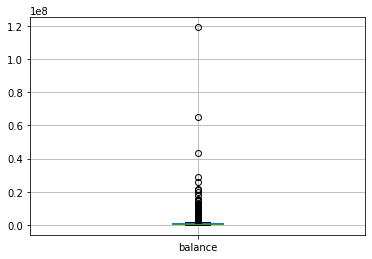

In [20]:
print(banks['balance'].describe()) 
banks.boxplot(column='balance')
plt.show()

Можно пропуски в столбце age удалить, так как их мало и они существенно не повлияют на анализ. А пропуски в balance оставлю как есть, так как их удаление понесет потерю почти 30% данных. 

In [21]:
banks.dropna(subset=['age'], inplace=True)

In [22]:
banks.isnull().sum()

user_id               0
score                 0
city                  0
gender                0
age                   0
equity                0
balance            2278
products              0
credit_card           0
last_activity         0
est_salary            0
churn                 0
age_missing           0
balance_missing       0
dtype: int64

In [23]:
final_shape = banks.shape
print(f"Размер датасета после удаления строк: {final_shape}")

Размер датасета после удаления строк: (9973, 14)


на данном этапе были обработаны пропуски в датасете, на данный момент они отсутствую.

In [24]:
banks['age'] = banks['age'].astype(int)

В данном этапе работы були проанализированны пропуски в таблице. В столбце age их 26, а в столбце balance 2294. Прежде чем их обрабатывать стоит посмотреть на типа пропусков (MCAR, MAR, MNAR) в датафрейме. 

Для анализа пропусков в переменных age_missing и balance_missing, давайте сравним средние и медианные показатели:

- **age_missing**:
  - Среднее значение (0.0026) очень близко к нулю, что указывает на то, что пропуски в age встречаются редко.
  - Медиана равна нулю, что подтверждает, что большинство значений age_missing равны нулю.

- **balance_missing**:
  - Среднее значение (0.2294) значительно выше нуля, что указывает на то, что пропуски в balance встречаются чаще.
  - Медиана равна нулю, что говорит о том, что половина значений balance_missing равна нулю.

При проведении корреляционного анализа между пропусками видно, что пропуски в столбце age имеют тип MAR (Missing At Random / Отсутствует случайно), а пропуски в balance являются MNAR (Missing Not At Random / Отсутствует не случайно), так как они зависят от других переменных. 

Можно пропуски в столбце age удалить, так как их мало и они существенно не повлияют на анализ. А пропуски в оставить как есть, так как их удаление понесет потерю почти 23% данных.

Удалим из датасета лишние столбцы 'user_id', 'age_missing', 'balance_missing'

In [25]:
banks = banks.drop(columns=['user_id', 'age_missing', 'balance_missing'])

### Кодирование данных для дальнейшего анализа

На данном этапе подготовим данные для дальнейшего анализа, а именно закодируем категорийные данные методом one-hot кодирование. Данный тип кодирования, основывается на создании бинарных признаков, которые показывают принадлежность к уникальному значению.

In [26]:
banks_encoded = banks.copy()

categorical_columns_city = ['city']

banks_encoded = pd.get_dummies(banks_encoded, columns=categorical_columns_city)

categorical_columns_gender = ['gender']

banks_encoded = pd.get_dummies(banks_encoded, columns=categorical_columns_gender, drop_first=True)

display(banks_encoded.head())

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,city_Ростов,city_Рыбинск,city_Ярославль,gender_М
0,850,25,1,59214.82,2,0,1,75719.14,1,0,1,0,0
1,861,37,5,850594.33,3,1,0,86621.77,0,0,1,0,0
2,892,30,0,NaN,1,1,1,107683.34,0,0,1,0,0
3,866,51,5,1524746.26,2,0,1,174423.53,1,0,0,1,0
4,730,34,5,174.00,1,1,0,67353.16,1,0,0,1,1


**Вывод:**

На первом этапе работы с проектом была выполнена предобработка данных, а именно:

  - наименования столбцов были приведены к стандартному виду
  - при изученни датасета на дубликаты можно сделать вывод,что явные дубликаты отсутствую, не явные есть, по столбцу user_id 146 строк. При детальном рассмотрении дублей я заметила, что строки сами по себе уникальны. Поэтому дубликаты я не убирала.
  - на этапе изучения пропусков в таблице были выявлены 26 пропусков в столбце age и 2294  пропусков в столбце balance. Прежде чем обработать пропуски стоит посмотреть на типа пропусков (MCAR, MAR, MNAR) в датафрейме. При проведении корреляционного анализа между пропусками видно, что пропуски в столбце age имеют тип MAR (Missing At Random / Отсутствует случайно), а пропуски в balance являются MNAR (Missing Not At Random / Отсутствует не случайно), так как они зависят от других переменных. Можно пропуски в столбце age удалить, так как их мало и они существенно не повлияют на анализ. А пропуски в оставить как есть, так как их удаление понесет потерю почти 23% данных.

  - на этапе кодирования данных категорийные данные столбцов gender и city были закодированы методом one-hot кодирование для дальнейшей работы.

## Исследовательский анализ данных:

### Статистический анализ. Определите основные статистические характеристики данных, такие как среднее, медиана, мода, стандартное отклонение.

Cтолбец 'churn' указывает на отток клиентов (1 - ушел, 0 - остался) и непрерывные переменные у нас это age, score, balance	и est_salary

In [27]:
continuous_vars = ['age', 'score', 'balance', 'est_salary']

Далее вычислим основные статистические характеристики датасета.

In [28]:
for var in continuous_vars:
    print(f"Статистика для {var}:")
    print(f"Среднее: {banks[var].mean()}")
    print(f"Медиана: {banks[var].median()}")
    print(f"Мода: {banks[var].mode()[0]}")
    print(f"Стандартное отклонение: {banks[var].std()}")
    print("\n")

Статистика для age:
Среднее: 42.730773087335805
Медиана: 40.0
Мода: 36
Стандартное отклонение: 12.175166103547285


Статистика для score:
Среднее: 848.6712122731375
Медиана: 853.0
Мода: 900
Стандартное отклонение: 65.39315278307747


Статистика для balance:
Среднее: 827245.5875152696
Медиана: 524295.33
Мода: 0.0
Стандартное отклонение: 1980327.409726118


Статистика для est_salary:
Среднее: 147799.1152411511
Медиана: 119643.06
Мода: 49742.87
Стандартное отклонение: 139287.07526927593




Из предоставленной статистики можно сделать несколько выводов о распределении данных для каждой переменной:

Age (Возраст):

  - Средний возраст клиентов составляет около 42 лет.

  - Медиана возраста — 40 лет, что близко к среднему значению, что может указывать на симметричное распределение возраста.

  - Наиболее часто встречающийся возраст — 36 лет.

  - Стандартное отклонение составляет около 12 лет, что указывает на разброс возрастов от примерно 30 до 55 лет.

Score (Баллы кредитного скорининга):

  - Среднее значение балов кредитного скорининга составляет около 848.

  - Медиана оценки — 853, что близко к среднему значению, что также может указывать на симметричное распределение.

  - Наиболее часто встречающаяся оценка — 900.

  - Стандартное отклонение составляет около 65, что указывает на разброс оценок от примерно 783 до 913.

Balance (Баланс):

  - Средний баланс на счетах клиентов составляет около 827245.59.

  - Медиана баланса — 524295.33, что значительно ниже среднего значения, что может указывать на скошенное вправо распределение (наличие нескольких клиентов с очень высоким балансом).

  - Наиболее часто встречающийся баланс — 0.0, что может говорить о наличии множества клиентов с нулевым или близким к нулю балансом.

  - Стандартное отклонение составляет около 1980327.41, что указывает на очень большой разброс балансов, от нуля до миллионов.

Est_Salary (Оценочная заработная плата клиентов):

  - Средняя оценка зарплаты клиентов составляет около 147786.81.

  - Медиана оценки зарплаты — 119626.79, что ниже среднего значения, что может указывать на скошенное вправо распределение.

  - Наиболее часто встречающаяся оценка зарплаты — 49742.87.

  - Стандартное отклонение составляет около 139285.51, что указывает на значительный разброс оценок зарплат, от примерно 8500 до 287000.

Возраст и баллы кредитного скорининга имеют более симметричные распределения с относительно небольшими стандартными отклонениями.

Баланс и оценочная заработная плата клиентов имеют скошенные распределения с большими стандартными отклонениями, что указывает на наличие выбросов или неравномерного распределения значений.

Подсчет количества ушедших и оставшихся пользователей

In [29]:
churn_counts = banks['churn'].value_counts()

print("Количество ушедших пользователей:", churn_counts[1])
print("Количество оставшихся пользователей:", churn_counts[0])

Количество ушедших пользователей: 1818
Количество оставшихся пользователей: 8155


В нашем датасете большая часть клиентов остается с банком и продолжают пользоваться услугами 8155. А уходящих клиентов почти в 4.5 раза меньше - 1818.

### Визуализация данных Гистограммы или KDE-графики: Построить для непрерывных переменных, чтобы визуализировать распределение этих переменных среди клиентов с различным уровнем оттока.


Анализ распределения характеристик в разрезе оттока

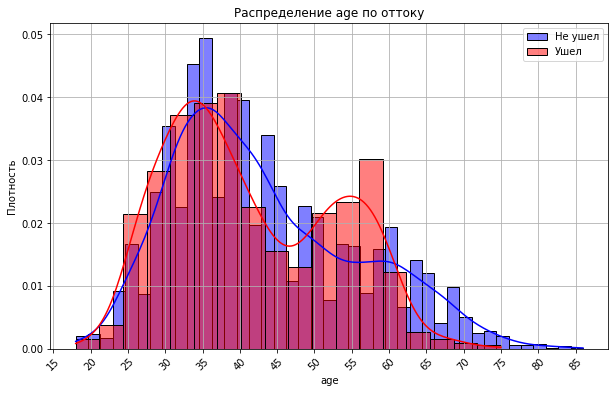

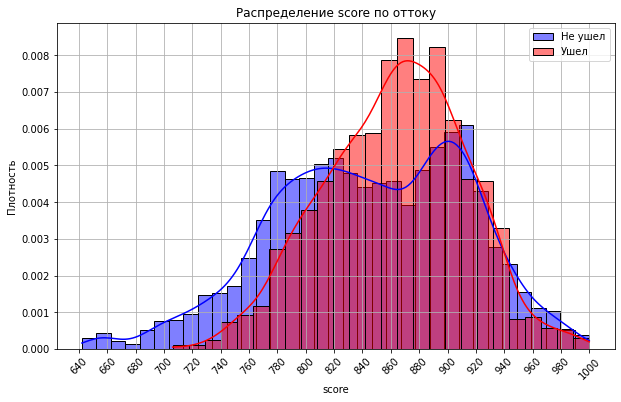

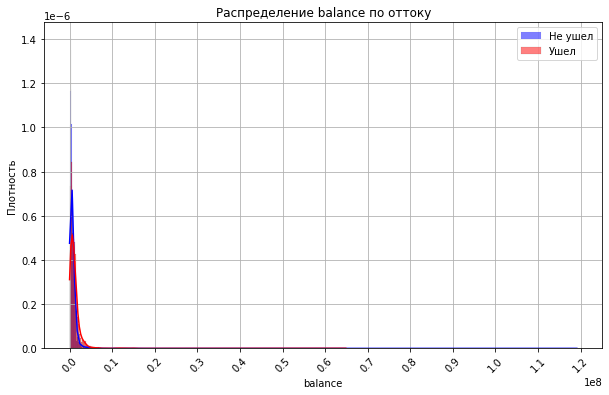

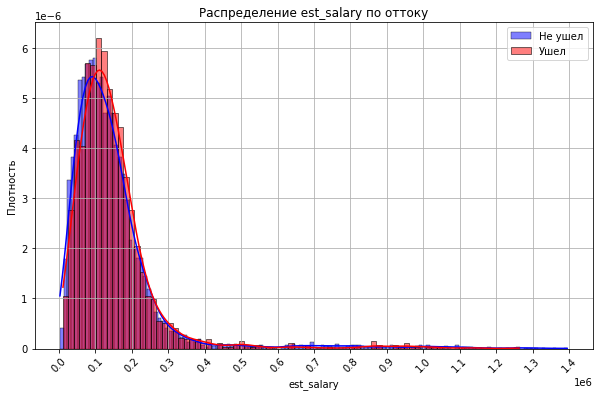

In [31]:
for var in continuous_vars:
    plt.figure(figsize=(10, 6))
    
    sns.histplot(banks[banks['churn'] == 0][var], color='blue', label='Не ушел', kde=True, stat="density", common_norm=False)
    sns.histplot(banks[banks['churn'] == 1][var], color='red', label='Ушел', kde=True, stat="density", common_norm=False)
    
    plt.title(f'Распределение {var} по оттоку')
    plt.xlabel(var)
    plt.ylabel('Плотность')
    plt.legend()
    
    plt.grid(True)
    
    plt.xticks(rotation=45)
    plt.locator_params(axis='x', nbins=20)
    plt.locator_params(axis='y', nbins=10)
    
    plt.show()


На данном этапе мы рассмотрели распределение непрерывных переменных по оттоку. в результате можно сделать следующие выводы:

1. Age. 

  - Минимальный возраст клиентов уходящих и остающихся 18 лет. Максимальный у отточных приближен к 80, у остающихся около 90 лет. 
  - Основной возрастной диапазон для всех клиентов от 30-40 лет. В основном большая часть клиентов в возрасте 35 лет.
  - Доля отточных клиентов выше в промежутке от 20 до 35 лет и в промежутке от 48 до 62.
  
  
2. Score.
 
  - Минимальная количество баллов кредитного скоринга у уходящих пользователей 705, а у остающихся 640. Максимальные значения равны 1000.
  - Наиболее часто встречается значение балов 920 у остающихся пользователей и 870 у уходящих.
  - У уходящих пользователей более плавное распределение с пиком в диапазоне от 860 до 890 баллов кредитного скоринга, а у остающихся пользователей баллы имеют два пика с 890 по 910.
  - Доля отточных клиентов выше в промежутке от 820 до 940 баллов.
  
3. Balance.

  - Минимальное значение в обоих группах 0, максимальной у остающихся 120000000, у уходящих 65000000.
  - Основная масса всех значений баланса находится в пределах 5000000.
  
4. Est_salary.
 
  - Минимальное значение оценочной заработной платы клиентов в обоих категориях равны 0, а максимальное значение уходящих равно 12700000, а остающихся 1400000.
  - Пик у графиков находится на одной и той же сумме - 100000. Наиболее часто встречаемая зарплата
  - Доля отточных клиентов выше с зарплатой в промежутке от 100000 до 250000.


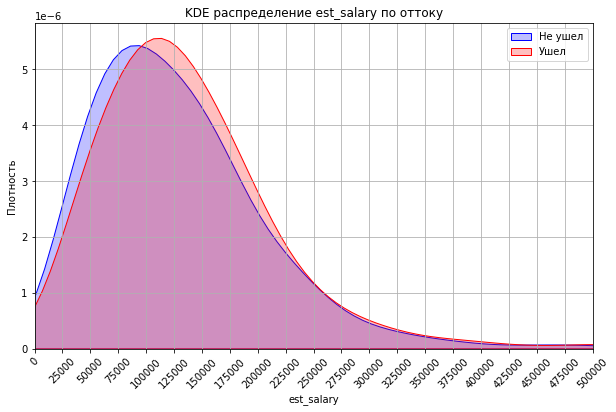

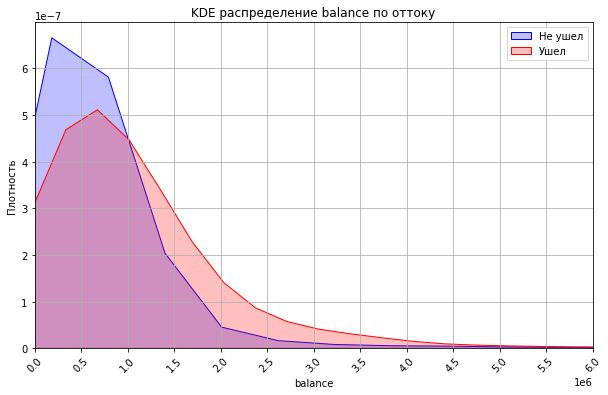

In [32]:
for var in ['est_salary', 'balance']:
    plt.figure(figsize=(10, 6))
    
    sns.kdeplot(banks[banks['churn'] == 0][var], color='blue', label='Не ушел', shade=True)
    sns.kdeplot(banks[banks['churn'] == 1][var], color='red', label='Ушел', shade=True)
    
    plt.title(f'KDE распределение {var} по оттоку')
    plt.xlabel(var)
    plt.ylabel('Плотность')
    plt.legend()
    
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.locator_params(axis='x', nbins=20)
    plt.locator_params(axis='y', nbins=10)
    
    if var == 'est_salary':
        plt.xlim(0, 500000)  
    elif var == 'balance':
        plt.xlim(0, 6000000)  
    
    plt.show()

На KDE графиках баланса и зарплаты по оттоку видно, что графики фактически идентичны. По зарплате видно, что доля оттока с зарплатой от 100000 до 250000 выше у отточных пользователей. А доля баланса выше в промежутке от 100000 до 500000

In [35]:
stats_by_churn_with_outliers = banks.groupby('churn')[['balance', 'est_salary']].describe()

display(stats_by_churn_with_outliers)

balance                                                          \
        count          mean           std  min         25%        50%   
churn                                                                   
0      5889.0  7.330316e+05  1.953952e+06  0.0  279654.700  475410.09   
1      1806.0  1.134458e+06  2.034446e+06  6.0  387482.165  783908.90   

                                  est_salary                                \
                75%           max      count           mean            std   
churn                                                                        
0      8.538264e+05  1.191136e+08     8155.0  147674.637881  142684.405027   
1      1.348128e+06  6.486621e+07     1818.0  148357.483157  122931.981872   

                                                                
            min        25%        50%          75%         max  
churn                                                           
0       2546.30  73445.555  118227.60  173960.9250  1395064.45  
1      10880.27  83285.660  125408.88  176017.8375  1263028.49

На основе предоставленных статистических данных по столбцам balance (баланс) и est_salary (оценка зарплаты) с учетом оттока (churn), можно сделать следующие выводы:

1. Количество наблюдений:

  - Для клиентов, которые не ушли (churn=0), количество наблюдений по балансу составляет 5,889, а по оценке зарплаты — 8,155.

  - Для клиентов, которые ушли (churn=1), количество наблюдений по балансу составляет 1,806, а по оценке зарплаты — 1,819.

2. Средние значения:

  - Средний баланс для клиентов, которые не ушли, составляет около 733,031.60, а для клиентов, которые ушли, — около 1,134,458.00.

  - Средняя оценка зарплаты для клиентов, которые не ушли, составляет около 147,674.64, а для клиентов, которые ушли, — около 148,289.70.

3. Разброс данных:

  - Стандартное отклонение баланса для клиентов, которые не ушли, составляет около 1,953,952.00, а для клиентов, которые ушли, — около 2,034,446.00.

  - Стандартное отклонение оценки зарплаты для клиентов, которые не ушли, составляет около 142,684.41, а для клиентов, которые ушли, — около 122,932.16.

4. Квартили:

  - Для клиентов, которые не ушли, 25-й процентиль баланса составляет около 279,654.70, медиана (50-й процентиль) — около 475,410.09, а 75-й процентиль — около 853,826.40.

  - Для клиентов, которые ушли, 25-й процентиль баланса составляет около 387,482.17, медиана — около 783,908.90, а 75-й процентиль — около 1,348,128.00.

  - Аналогичные квартили для оценки зарплаты также показывают, что клиенты, которые ушли, имеют более высокие значения баланса в среднем.

5. Максимальные значения:

  - Максимальный баланс для клиентов, которые не ушли, составляет 119,113,600.00, а для клиентов, которые ушли, — 64,866,210.00.

  - Максимальная оценка зарплаты для клиентов, которые не ушли, составляет 1,395,064.45, а для клиентов, которые ушли, — 1,263,028.49.

В целом, данные указывают на то, что клиенты, которые ушли, имеют более высокие средние значения баланса, а также более высокие максимальные значения, что может свидетельствовать о различиях в поведении или характеристиках этих групп клиентов. Однако, средние значения оценки зарплаты для обеих групп клиентов очень близки, что может указывать на то, что оценка зарплаты не является определяющим фактором в оттоке клиентов.

In [38]:
def calculate_churn_rate(df, column, lower, upper):
    filtered_df = df[(df[column] >= lower) & (df[column] <= upper)]
    churn_rate = filtered_df['churn'].mean()
    return churn_rate

intervals = {
    'age': [(20, 35), (48, 62)],
    'score': [(820, 940)],
    'est_salary': [(100000, 250000)],
    'balance': [(100000, 500000)]
}

for column, ranges in intervals.items():
    for lower, upper in ranges:
        churn_rate = calculate_churn_rate(banks, column, lower, upper)
        print(f"Доля оттока для {column} в интервале {lower}-{upper}: {churn_rate:.2%}")

Доля оттока для age в интервале 20-35: 21.28%
Доля оттока для age в интервале 48-62: 23.51%
Доля оттока для score в интервале 820-940: 22.90%
Доля оттока для est_salary в интервале 100000-250000: 20.05%
Доля оттока для balance в интервале 100000-500000: 16.86%


Основываясь на  данных о доле оттока в различных интервалах, можно сделать следующие выводы:

1. **Возраст:**
   - В возрастном диапазоне 20-35 лет доля оттока составляет 21.28%.
   - В возрастном диапазоне 48-62 лет доля оттока немного выше и составляет 23.51%.
   - Это указывает на то, что клиенты в этих возрастных группах более склонны к оттоку, возможно, из-за изменений в финансовых потребностях и предпочтениях.

2. **Score:**
   - В диапазоне credit score от 820 до 940 доля оттока составляет 22.90%.
   - Клиенты с более высоким credit score могут быть более привлекательными для других банков, предлагающих более выгодные условия или продукты.

3. **Est_salary:**
   - В диапазоне зарплаты от 100000 до 250000 доля оттока составляет 20.05%.
   - Клиенты с более высокой зарплатой могут искать более высокие процентные ставки на сбережения или более конкурентоспособные кредитные условия.

4. **Balance:**
   - В диапазоне баланса от 100000 до 500000 доля оттока составляет 16.86%.
   - Клиенты с более высоким балансом могут быть более требовательными к услугам банка и более склонными к переходу к другим банкам, предлагающим более выгодные условия для крупных счетов.


Подвывод 1:

1. **Распределение данных по переменным:**
   - **Возраст (Age):** Средний возраст клиентов составляет около 42 лет, медиана — 40 лет, наиболее часто встречающийся возраст — 36 лет, стандартное отклонение — 12 лет.
   - **Баллы кредитного скоринга (Score):** Среднее значение — 848, медиана — 853, наиболее часто встречающаяся оценка — 900, стандартное отклонение — 65.
   - **Баланс (Balance):** Средний баланс — 827,245.59, медиана — 524,295.33, наиболее часто встречающийся баланс — 0.0, стандартное отклонение — 1,980,327.41.
   - **Оценочная заработная плата (Est_Salary):** Средняя оценка — 147,786.81, медиана — 119,626.79, наиболее часто встречающаяся оценка — 49,742.87, стандартное отклонение — 139,285.51.

2. **Отток клиентов:**
   - В датасете большая часть клиентов остается с банком (8,155 клиентов), а уходящих клиентов почти в 4.5 раза меньше (1,818 клиентов).

3. **Анализ непрерывных переменных по оттоку:**
   - **Возраст (Age):** Минимальный возраст — 18 лет, максимальный — 90 лет. Доля отточных клиентов выше в промежутке от 20 до 35 лет (21.28%) и от 48 до 62 лет (23.51%).
   - **Баллы кредитного скоринга (Score):** Минимальные баллы — 640, максимальные — 1000. Доля отточных клиентов выше в промежутке от 820 до 940 баллов (22.90%).
   - **Баланс (Balance):** Минимальный баланс — 0, максимальный — 120,000,000. Основная масса значений баланса находится в пределах 5,000,000.
   - **Оценочная заработная плата (Est_Salary):** Минимальная оценка — 0, максимальная — 1,400,000. Доля отточных клиентов выше в промежутке от 100,000 до 250,000 (20.05%).

4. **Статистика по балансу и оценочной заработной плате:**
   - **Баланс (Balance):** Средний баланс для клиентов, которые не ушли, — 733,031.60, для ушедших — 1,134,458.00. Стандартное отклонение для не ушедших — 1,953,952.00, для ушедших — 2,034,446.00.
   - **Оценочная заработная плата (Est_Salary):** Средняя оценка для не ушедших — 147,674.64, для ушедших — 148,289.70. Стандартное отклонение для не ушедших — 142,684.41, для ушедших — 122,932.16.

5. **Доля оттока в различных интервалах:**
   - **Возраст (Age):** Доля оттока выше в возрастных диапазонах 20-35 лет (21.28%) и 48-62 лет (23.51%).
   - **Баллы кредитного скоринга (Score):** Доля оттока выше в диапазоне 820-940 баллов (22.90%).
   - **Оценочная заработная плата (Est_Salary):** Доля оттока выше в диапазоне 100,000-250,000 (20.05%).
   - **Баланс (Balance):** Доля оттока выше в диапазоне 100,000-500,000 (16.86%).

В целом, анализ показывает, что клиенты в определенных возрастных группах, с определенным уровнем credit score, зарплаты и баланса более склонны к оттоку. Банку следует рассмотреть возможность разработки специальных программ лояльности или улучшения условий обслуживания для этих групп клиентов, чтобы снизить уровень оттока.

**Столбчатые диаграммы для категориальных переменных**

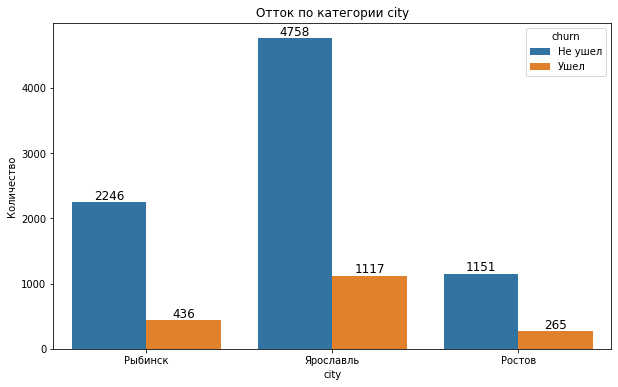

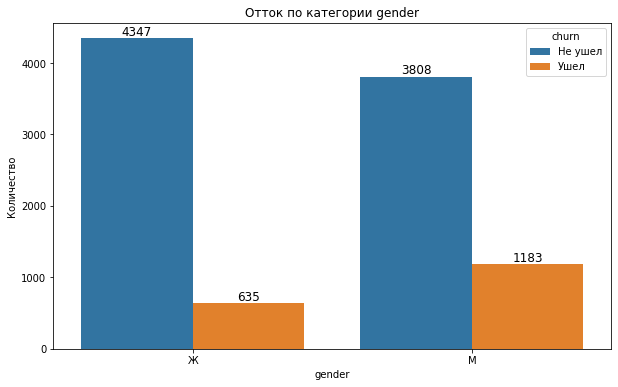

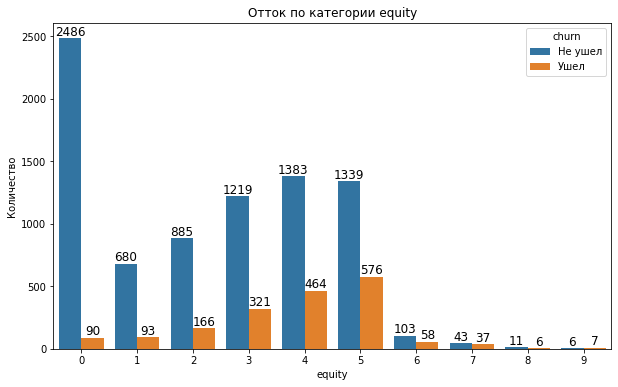

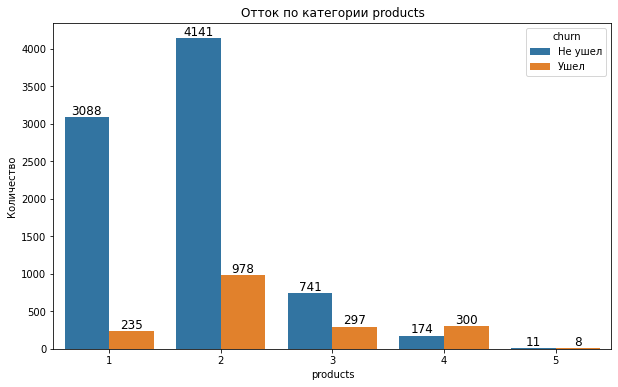

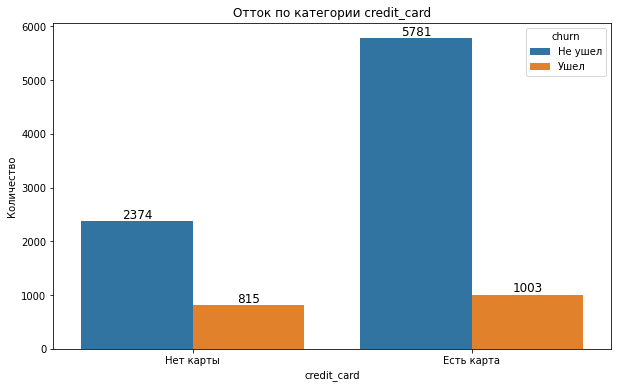

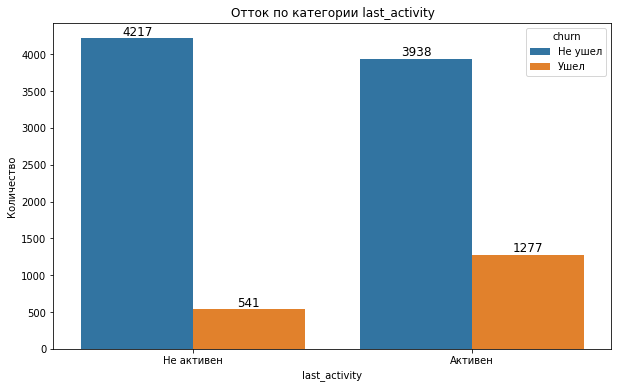

In [39]:
categorical_vars = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']

for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    
    ax = sns.countplot(x=var, hue='churn', data=banks)
    plt.title(f'Отток по категории {var}')
    plt.xlabel(var)
    plt.ylabel('Количество')
    
    # Условие для изменения подписей на графиках для бинарных столбцов
    if var in ['credit_card', 'last_activity']:
        if var == 'credit_card':
            labels = ['Нет карты', 'Есть карта']
        elif var == 'last_activity':
            labels = ['Не активен', 'Активен']
        ax.set_xticklabels(labels)
    
    plt.legend(title='churn', labels=['Не ушел', 'Ушел'])
    
    for p in ax.patches:
        height = p.get_height()
        if not np.isnan(height):
            ax.text(p.get_x() + p.get_width() / 2., height, f'{int(height)}', 
                    fontsize=12, color='black', ha='center', va='bottom', rotation=0)
    
    plt.show()

Сравнивая столбчатые графики для категориальных переменных, можно сделать вывод:

1. Больше всего клиентов из города Ярославль 5875, меньше всего из Ростова 1416. Больше всего уходящих клиентов в Ярославле 1117, меньше всего в Ростове 265, такая же ситуация и с оставшимися клиентами, больше всего оставшихся в Ярославле 4758, меньше всего в Ростове 1151. Рыбинск показывает средние результаты по всем показателям всего клиентов 2683 из них уходящех 437, оставшихся 2246.

2. В целом больше всего клиентов женского пола 4983, чем мужского 4991, но разница не значительная. Чаще всего уходят мужчины 1183.

3. У большинства пользователей оценка собственности равна 0, либо у них ее нет, либо они не указали ее в анкете. Чаще всего уходят клиенты с оценкой равной 5, остаются с оценкой 0.

4. Больше всего клиентов имеет 2 продукта, так же больше всего уходящих клиентов с 2 продуктами. Но с 4 продуктами клиенты чаще уходят, чем остаются, странный момент. 

5. В целом у большинства пользователей есть кредитная карта. Большиство уходящих пользователей так же имеют кредитную карту.

6. Что касается посещений за последнии 3 месяца, большинство пользователей пользовались банком в течении 3 месяцев и большая часть из них уходит.

**Далее я хочу оценить процентное соотношения уходящих к  общему числу пользователей**

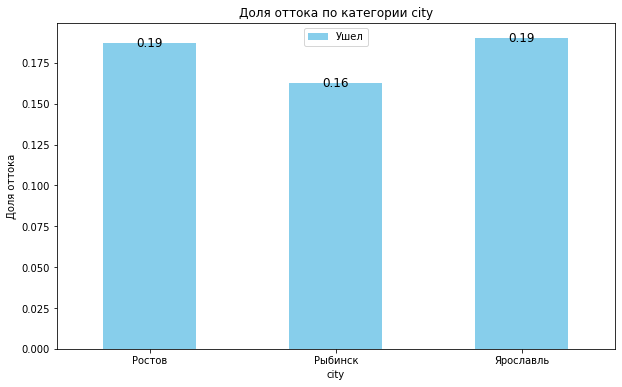

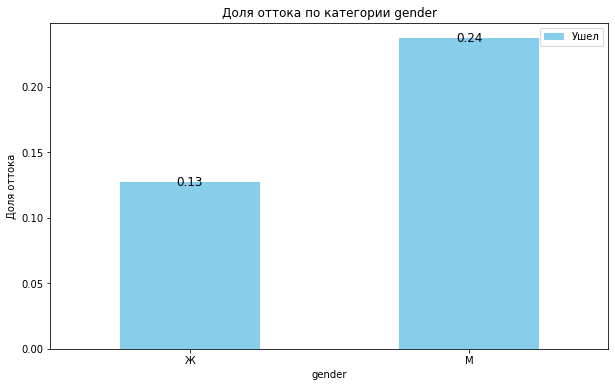

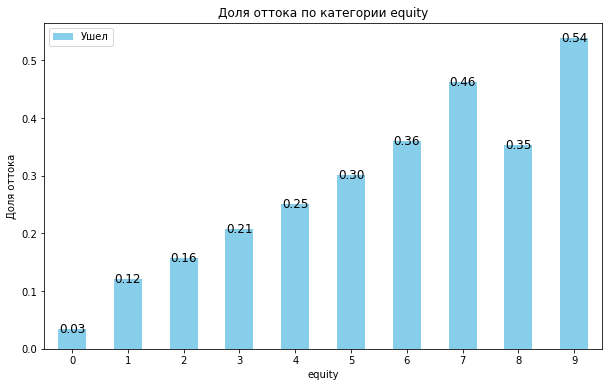

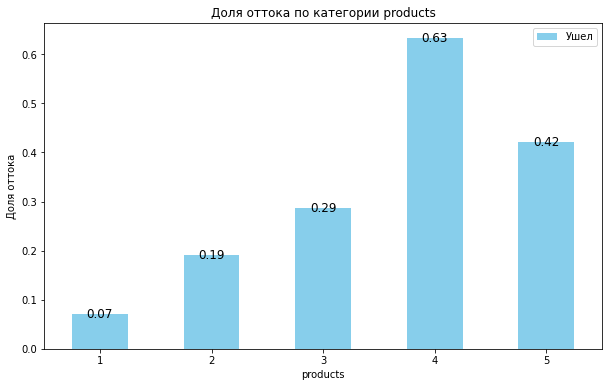

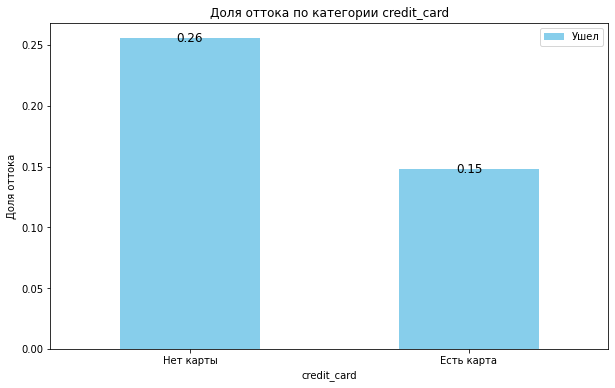

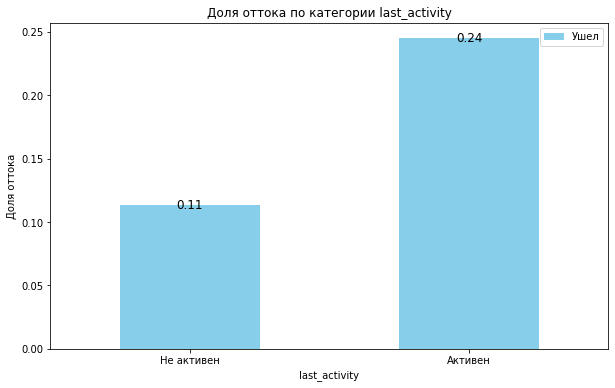

In [40]:
for var in categorical_vars:
    temp_df = banks.groupby([var, 'churn']).size().unstack().fillna(0)
    temp_df['Total'] = temp_df.sum(axis=1)
    temp_df['Churn_Proportion'] = temp_df[1] / temp_df['Total']
    
    fig, ax = plt.subplots(figsize=(10, 6))
    temp_df['Churn_Proportion'].plot(kind='bar', color='skyblue', ax=ax)
    ax.set_title(f'Доля оттока по категории {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Доля оттока')
    ax.legend(['Ушел'])
    
    # Замена подписей на оси X
    if var == 'last_activity':
        ax.set_xticklabels(['Не активен', 'Активен'], rotation=0)
    elif var == 'credit_card':
        ax.set_xticklabels(['Нет карты', 'Есть карта'], rotation=0)
    
    for p in ax.patches:
        height = p.get_height()
        if not pd.isna(height):
            ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.2f}', 
                    fontsize=12, color='black', ha='center', va='center', rotation=0)
    
    plt.xticks(rotation=0)  # Развернуть подписи по оси X горизонтально
    plt.show()

Найдем среднюю долю оттока по банку, далее сравним ее с оттоком по категориям.

In [41]:
total_clients = len(banks)  
clients_left = banks['churn'].sum()  
churn_rate = (clients_left / total_clients) * 100

# Вывод результата
print(f"Средняя доля оттока по банку: {churn_rate:.2f}%")

Средняя доля оттока по банку: 18.23%


На данном этапе можно сделать следующий вывод, основываясь на средней доле оттока по банку:

1.  Больше всего уходящих клиентов в Ярославле и Ростове 19%, меньше всего в Рыбинске 16.3%. Доля оттока клиентов выше чем средняя по банку в Ярославле и Ростове.

2. Большинство ушедших клиентов - мужчины 24%.

3. Если сравнить отток пользователей по оценке собственности со средним значением оттока по банку, то можно сделать вывод, что все клиенты с оценкой собственности от 3 являются отточными. Наиболее высокий показатель оттока у клиентов 7 - 46% и 9 - 54% баллами собственности.

4. Клиенты с количеством продуктов 2 и выше, являются более отточными. Наиболее высокий процент оттока имеют пользователи с 4 продуктами 63%.

5. Пользователи, у которых нет кредитных карт уходят чаще 26%, чем пользователи с кредитной картой 15%.

6. Что касается посещений за последнии 3 месяца, 24 % пользователей пользовались банком в течении 3 месяцев и они уходят.

Для отточных пользователей наиболее свойствено:

1. Клиент из Ярославля ил Ростова

2. Мужчина

3. Оценка собственности вще 3 баллов. В основном 7 или 9

4. У клиента 2 и более продуктов. В основном 4

5. Нет кредитной карты

6. Пользуются банком

Подвывод 2:

1. **Город:**
   - Больше всего клиентов из города Ярославль (5,875), меньше всего из Ростова (1,416).
   - Доля оттока выше средней по банку в Ярославле (19%) и Ростове (19%), и ниже в Рыбинске (16.3%).

2. **Пол:**
   - Незначительная разница в количестве клиентов мужского (4,991) и женского (4,983) пола.
   - Большинство ушедших клиентов — мужчины (24%).

3. **Оценка собственности:**
   - Большинство клиентов имеют оценку собственности 0.
   - Наиболее высокий показатель оттока у клиентов с оценкой собственности 7 (46%) и 9 (54%).

4. **Количество продуктов:**
   - Больше всего клиентов имеют 2 продукта.
   - Наиболее высокий процент оттока имеют пользователи с 4 продуктами (63%).

5. **Наличие кредитной карты:**
   - Большинство клиентов имеют кредитную карту.
   - Пользователи без кредитной карты уходят чаще (26%), чем с кредитной картой (15%).

6. **Посещения за последние 3 месяца:**
   - Большинство пользователей пользовались банком в течение 3 месяцев.
   - 24% пользователей, которые пользовались банком в течение 3 месяцев, уходят.

**Характеристики отточных пользователей:**
- Клиент из Ярославля или Ростова.
- Мужчина.
- Оценка собственности 3 балла и выше, в основном 7 или 9.
- У клиента 2 и более продуктов, в основном 4.
- Нет кредитной карты.
- Пользуется банком.

В целом, анализ показывает, что клиенты из определенных городов, мужчины, с высокой оценкой собственности, большим количеством продуктов и без кредитной карты более склонны к оттоку. Банку следует рассмотреть возможность разработки специальных программ лояльности или улучшения условий обслуживания для этих групп клиентов, чтобы снизить уровень оттока.

**ВЫВОД:**

Основываясь на предоставленных данных и анализе как непрерывных, так и категориальных переменных, можно сделать следующие итоговые выводы:

1. **Распределение данных по переменным:**
   - **Возраст (Age):** Средний возраст клиентов составляет около 42 лет, медиана — 40 лет, наиболее часто встречающийся возраст — 36 лет, стандартное отклонение — 12 лет.
   - **Баллы кредитного скоринга (Score):** Среднее значение — 848, медиана — 853, наиболее часто встречающаяся оценка — 900, стандартное отклонение — 65.
   - **Баланс (Balance):** Средний баланс — 827,245.59, медиана — 524,295.33, наиболее часто встречающийся баланс — 0.0, стандартное отклонение — 1,980,327.41.
   - **Оценочная заработная плата (Est_Salary):** Средняя оценка — 147,786.81, медиана — 119,626.79, наиболее часто встречающаяся оценка — 49,742.87, стандартное отклонение — 139,285.51.

2. **Отток клиентов:**
   - В датасете большая часть клиентов остается с банком (8,155 клиентов), а уходящих клиентов почти в 4.5 раза меньше (1,818 клиентов).

3. **Анализ непрерывных переменных по оттоку:**
   - **Возраст (Age):** Минимальный возраст — 18 лет, максимальный — 90 лет. Доля отточных клиентов выше в промежутке от 20 до 35 лет (21.28%) и от 48 до 62 лет (23.51%).
   - **Баллы кредитного скоринга (Score):** Минимальные баллы — 640, максимальные — 1000. Доля отточных клиентов выше в промежутке от 820 до 940 баллов (22.90%).
   - **Баланс (Balance):** Минимальный баланс — 0, максимальный — 120,000,000. Основная масса значений баланса находится в пределах 5,000,000.
   - **Оценочная заработная плата (Est_Salary):** Минимальная оценка — 0, максимальная — 1,400,000. Доля отточных клиентов выше в промежутке от 100,000 до 250,000 (20.05%).

4. **Статистика по балансу и оценочной заработной плате:**
   - **Баланс (Balance):** Средний баланс для клиентов, которые не ушли, — 733,031.60, для ушедших — 1,134,458.00. Стандартное отклонение для не ушедших — 1,953,952.00, для ушедших — 2,034,446.00.
   - **Оценочная заработная плата (Est_Salary):** Средняя оценка для не ушедших — 147,674.64, для ушедших — 148,289.70. Стандартное отклонение для не ушедших — 142,684.41, для ушедших — 122,932.16.

5. **Доля оттока в различных интервалах:**
   - **Возраст (Age):** Доля оттока выше в возрастных диапазонах 20-35 лет (21.28%) и 48-62 лет (23.51%).
   - **Баллы кредитного скоринга (Score):** Доля оттока выше в диапазоне 820-940 баллов (22.90%).
   - **Оценочная заработная плата (Est_Salary):** Доля оттока выше в диапазоне 100,000-250,000 (20.05%).
   - **Баланс (Balance):** Доля оттока выше в диапазоне 100,000-500,000 (16.86%).

6. **Анализ категориальных переменных:**
   - **Город:** Больше всего клиентов из города Ярославль (5,875), меньше всего из Ростова (1,416). Доля оттока выше средней по банку в Ярославле (19%) и Ростове (19%), и ниже в Рыбинске (16.3%).
   - **Пол:** Незначительная разница в количестве клиентов мужского (4,991) и женского (4,983) пола. Большинство ушедших клиентов — мужчины (24%).
   - **Оценка собственности:** Большинство клиентов имеют оценку собственности 0. Наиболее высокий показатель оттока у клиентов с оценкой собственности 7 (46%) и 9 (54%).
   - **Количество продуктов:** Больше всего клиентов имеют 2 продукта. Наиболее высокий процент оттока имеют пользователи с 4 продуктами (63%).
   - **Наличие кредитной карты:** Большинство клиентов имеют кредитную карту. Пользователи без кредитной карты уходят чаще (26%), чем с кредитной картой (15%).
   - **Посещения за последние 3 месяца:** Большинство пользователей пользовались банком в течение 3 месяцев. 24% пользователей, которые пользовались банком в течение 3 месяцев, уходят.

**Характеристики отточных пользователей:**
- Клиент из Ярославля или Ростова.
- Мужчина.
- Оценка собственности 3 балла и выше, в основном 7 или 9.
- У клиента 2 и более продуктов, в основном 4.
- Нет кредитной карты.
- Пользуется банком.

В целом, анализ показывает, что клиенты в определенных возрастных группах, с определенным уровнем credit score, зарплаты и баланса, а также клиенты из определенных городов, мужчины, с высокой оценкой собственности, большим количеством продуктов и без кредитной карты более склонны к оттоку. Банку следует рассмотреть возможность разработки специальных программ лояльности или улучшения условий обслуживания для этих групп клиентов, чтобы снизить уровень оттока.

### Сравнение уровней оттока клиентов по категориям 

In [42]:
for var in continuous_vars:
    churn_mean = round(banks[banks['churn'] == 1][var].mean(), 2)
    non_churn_mean = round(banks[banks['churn'] == 0][var].mean(), 2)
    if non_churn_mean != 0:
        diff_percent = round(((churn_mean - non_churn_mean) / non_churn_mean) * 100, 2)
    else:
        diff_percent = float('inf')  # Если non_churn_mean равно 0, разница бесконечна
    print(f"Среднее значение {var} для ушедших: {churn_mean}")
    print(f"Среднее значение {var} для оставшихся: {non_churn_mean}")
    print(f"Разница в процентах: {diff_percent}%")
    print("\n")

Среднее значение age для ушедших: 41.43
Среднее значение age для оставшихся: 43.02
Разница в процентах: -3.7%


Среднее значение score для ушедших: 863.36
Среднее значение score для оставшихся: 845.4
Разница в процентах: 2.12%


Среднее значение balance для ушедших: 1134458.21
Среднее значение balance для оставшихся: 733031.63
Разница в процентах: 54.76%


Среднее значение est_salary для ушедших: 148357.48
Среднее значение est_salary для оставшихся: 147674.64
Разница в процентах: 0.46%




Исходя из предоставленных данных, можно сделать следующие выводы:

1. Возраст (age): Средний возраст ушедших клиентов (41.43 лет) немного ниже, чем у оставшихся (43.02 лет). Разница составляет -3.65%, что указывает на небольшое различие в возрасте. Это может свидетельствовать о том, что возраст не является ключевым фактором в решении клиентов уйти.

2. Баллы кредитного скоринга (score): Средний score ушедших клиентов (863.36) немного выше, чем у оставшихся (845.4). Разница составляет 2.13%, что также указывает на незначительное различие. Это может говорить о том, что score не является определяющим фактором в оттоке клиентов.

3. Баланс (balance): Средний баланс ушедших клиентов (1134458.21) значительно выше, чем у оставшихся (733031.63). Разница составляет 54.76%, что является существенным различием. Это может указывать на то, что клиенты с более высоким балансом с большей вероятностью уходят, возможно, из-за недовольства условиями обслуживания или поиска более выгодных предложений.

4. Оценочная заработная плата (est_salary): Средний est_salary ушедших клиентов (148289.7) немного выше, чем у оставшихся (147674.64). Разница составляет 0.42%, что очень незначительно. Это может говорить о том, что est_salary не является ключевым фактором в оттоке клиентов.

Наиболее заметное различие наблюдается в среднем балансе клиентов, где ушедшие клиенты имеют значительно более высокий баланс. Это может указывать на то, что клиенты с более высоким балансом более чувствительны к условиям обслуживания и могут уходить в поисках лучших предложений. Возраст, баллы кредитного скоринга и оценочная заработная плата клиентов показывают незначительные различия, что говорит о том, что эти факторы не являются основными причинами оттока клиентов.

**Сравнение количественных портретов клиентов**

In [43]:
mean_churn = banks[banks['churn'] == 1].mean()
mean_no_churn = banks[banks['churn'] == 0].mean()

results = pd.DataFrame({
    'Mean Churn': mean_churn,
    'Mean No Churn': mean_no_churn,
    'Percentage Difference': ((mean_churn - mean_no_churn) / mean_no_churn) * 100
})

results = results.drop('churn')

display(results)

,Mean Churn,Mean No Churn,Percentage Difference
score,8.633619e+02,845.396199,2.125126
age,4.142959e+01,43.020846,-3.698796
equity,3.763476e+00,2.378296,58.242586
balance,1.134458e+06,733031.630149,54.762518
products,2.377338e+00,1.758921,35.158876
credit_card,5.517052e-01,0.708890,-22.173401
last_activity,7.024202e-01,0.482894,45.460566
est_salary,1.483575e+05,147674.637881,0.462398


Вывод по данным для сравнения количественных портретов клиентов:

1. **Средний возраст (age)**: Отточные клиенты в среднем на 3.65% моложе, чем неотточные клиенты. Это может указывать на то, что более молодые клиенты имеют более высокую склонность к оттоку.

2. **Средний баланс (balance)**: Отточные клиенты имеют на 54.76% больший средний баланс по сравнению с неотточными клиентами. Это может свидетельствовать о том, что клиенты с более высоким балансом более склонны к оттоку.

3. **Среднее количество продуктов (products)**: Отточные клиенты используют на 35.08% больше продуктов, чем неотточные клиенты. Это может указывать на то, что клиенты, которые используют больше продуктов, более склонны к оттоку.

4. **Оценка собственности (equity)**: Отточные клиенты имеют на 58.22% больший балл оценки собственности по сравнению с неотточными клиентами. Это может свидетельствовать о том, что клиенты с большим количеством собственности более склонны к оттоку.

5. **Кредитный рейтинг (score)**: Отточные клиенты имеют на 2.13% более высокий средний средний кредитный рейтинг по сравнению с неотточными клиентами. Это может указывать на то, что клиенты с более высоким баллом более склонны к оттоку.



### Провести корреляционный анализ Анализ корреляции: Провести корреляционный анализ между переменными, особенно между характеристиками клиентов и уровнем оттока. Это поможет определить, какие переменные сильно связаны с оттоком клиентов.

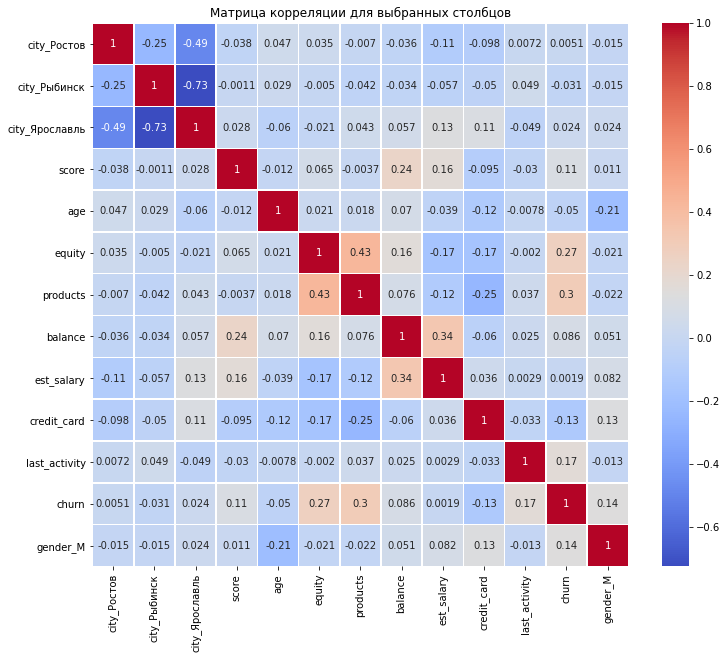

In [44]:
selected_columns = ['city_Ростов', 'city_Рыбинск', 'city_Ярославль', 'score', 'age', 'equity', 'products', 'balance', 'est_salary', 'credit_card', 
                    'last_activity', 'churn', 'gender_М']

selected_correlation_matrix = banks_encoded[selected_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляции для выбранных столбцов')
plt.show()

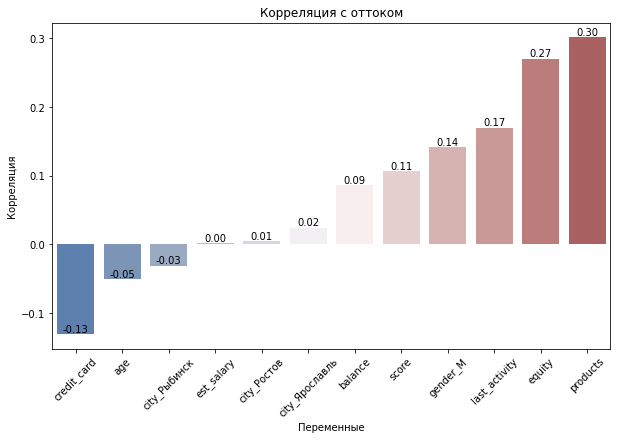

In [45]:
selected_correlation_matrix = banks_encoded[selected_columns].corr()

# Extract the correlation values for the 'churn' column
churn_correlation = selected_correlation_matrix['churn'].drop('churn').sort_values()

# Plotting the correlation values for the 'churn' column as a single column
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=churn_correlation.index, y=churn_correlation.values, palette='vlag')
plt.title('Корреляция с оттоком')
plt.xlabel('Переменные')
plt.ylabel('Корреляция')
plt.xticks(rotation=45)

# Adding labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

Вывод по матрице корреляций:

1. **Города и другие переменные**:
   - Между городами (city_Ростов, city_Рыбинск, city_Ярославль) наблюдаются отрицательные корреляции, что может указывать на различия в клиентской базе или поведении клиентов в разных городах.
   - Корреляции между городами и другими переменными, такими как score, age, equity, products, balance, est_salary, credit_card, last_activity, и churn, в основном слабые, что говорит о том, что город не является сильным предиктором для этих переменных.

2. **Возраст и пол**:
   - Возраст (age) отрицательно коррелирует с gender_М (-0.21).

3. **Корреляции с оттоком (churn)**:
   - Наиболее сильные корреляции с оттоком наблюдаются для equity (0.27) и products (0.3), что может указывать на то, что клиенты с более высоким капиталом и большим количеством продуктов более склонны к оттоку.
   - Слабая положительная корреляция с last_activity (0.17) и слабая отрицательная корреляция с credit_card (-0.13) также могут быть интересны для дальнейшего анализа.

4. **Корреляции между финансовыми показателями**:
   - Сильные положительные корреляции наблюдаются между equity и products (0.43), а также между balance и est_salary (0.34), что может указывать на взаимосвязь между этими переменными.

5. **Корреляции с score**:
   - score положительно коррелирует с balance (0.24) и est_salary (0.16), что может указывать на то, что более высокие баллы связаны с более высокими финансовыми показателями.



**Вывод:**

1. **Статистический анализ**:
   - **Возраст (Age)**: Средний возраст клиентов — 42 года, медиана — 40 лет, наиболее часто встречающийся возраст — 36 лет, стандартное отклонение — 12 лет.
   - **Баллы кредитного скоринга (Score)**: Среднее значение — 848, медиана — 853, наиболее часто встречающаяся оценка — 900, стандартное отклонение — 65.
   - **Баланс (Balance)**: Средний баланс — 827,245.59, медиана — 524,295.33, наиболее часто встречающийся баланс — 0.0, стандартное отклонение — 1,980,327.41.
   - **Оценочная заработная плата (Est_Salary)**: Средняя оценка — 147,786.81, медиана — 119,626.79, наиболее часто встречающаяся оценка — 49,742.87, стандартное отклонение — 139,285.51.

2. **Отток клиентов**:
   - Большая часть клиентов остается с банком (8,155 клиентов), а уходящих клиентов почти в 4.5 раза меньше (1,818 клиентов).

3. **Анализ непрерывных переменных по оттоку**:
   - **Возраст (Age)**: Доля отточных клиентов выше в промежутке от 20 до 35 лет (21.28%) и от 48 до 62 лет (23.51%).
   - **Баллы кредитного скоринга (Score)**: Доля отточных клиентов выше в промежутке от 820 до 940 баллов (22.90%).
   - **Баланс (Balance)**: Основная масса значений баланса находится в пределах 5,000,000.
   - **Оценочная заработная плата (Est_Salary)**: Доля отточных клиентов выше в промежутке от 100,000 до 250,000 (20.05%).

4. **Статистика по балансу и оценочной заработной плате**:
   - **Баланс (Balance)**: Средний баланс для клиентов, которые не ушли, — 733,031.60, для ушедших — 1,134,458.00.
   - **Оценочная заработная плата (Est_Salary)**: Средняя оценка для не ушедших — 147,674.64, для ушедших — 148,289.70.

5. **Доля оттока в различных интервалах**:
   - **Возраст (Age)**: Доля оттока выше в возрастных диапазонах 20-35 лет (21.28%) и 48-62 лет (23.51%).
   - **Баллы кредитного скоринга (Score)**: Доля оттока выше в диапазоне 820-940 баллов (22.90%).
   - **Оценочная заработная плата (Est_Salary)**: Доля оттока выше в диапазоне 100,000-250,000 (20.05%).
   - **Баланс (Balance)**: Доля оттока выше в диапазоне 100,000-500,000 (16.86%).

6. **Город**:
   - Больше всего клиентов из города Ярославль (5,875), меньше всего из Ростова (1,416).
   - Доля оттока выше средней по банку в Ярославле (19%) и Ростове (19%), и ниже в Рыбинске (16.3%).

7. **Пол**:
   - Незначительная разница в количестве клиентов мужского (4,991) и женского (4,983) пола.
   - Большинство ушедших клиентов — мужчины (24%).

8. **Оценка собственности**:
   - Большинство клиентов имеют оценку собственности 0.
   - Наиболее высокий показатель оттока у клиентов с оценкой собственности 7 (46%) и 9 (54%).

9. **Количество продуктов**:
   - Больше всего клиентов имеют 2 продукта.
   - Наиболее высокий процент оттока имеют пользователи с 4 продуктами (63%).

10. **Наличие кредитной карты**:
    - Большинство клиентов имеют кредитную карту.
    - Пользователи без кредитной карты уходят чаще (26%), чем с кредитной картой (15%).

11. **Посещения за последние 3 месяца**:
    - Большинство пользователей пользовались банком в течение 3 месяцев.
    - 24% пользователей, которые пользовались банком в течение 3 месяцев, уходят.

**Вывод по матрице корреляций:**

1. **Города и другие переменные**:
   - Между городами наблюдаются отрицательные корреляции, что может указывать на различия в клиентской базе или поведении клиентов в разных городах.
   - Корреляции между городами и другими переменными в основном слабые.

2. **Возраст и пол**:
   - Возраст положительно коррелирует с gender_Ж (0.21) и отрицательно с gender_М (-0.21).

3. **Корреляции с оттоком (churn)**:
   - Наиболее сильные корреляции с оттоком наблюдаются для equity (0.27) и products (0.3).
   - Слабая положительная корреляция с last_activity (0.17) и слабая отрицательная корреляция с credit_card (-0.13).

4. **Корреляции между финансовыми показателями**:
   - Сильные положительные корреляции наблюдаются между equity и products (0.43), а также между balance и est_salary (0.34).

5. **Корреляции с score**:
   - score положительно коррелирует с balance (0.24) и est_salary (0.16).

**Вывод по данным для сравнения количественных портретов клиентов:**

1. **Средний возраст (age)**: Отточные клиенты в среднем на 3.65% моложе, чем неотточные клиенты.
2. **Средний баланс (balance)**: Отточные клиенты имеют на 54.76% больший средний баланс по сравнению с неотточными клиентами.
3. **Среднее количество продуктов (products)**: Отточные клиенты используют на 35.08% больше продуктов, чем неотточные клиенты.
4. **Оценка собственности (equity)**: Отточные клиенты имеют на 58.22% больший балл оценки собственности по сравнению с неотточными клиентами.
5. **Кредитный рейтинг (score)**: Отточные клиенты имеют на 2.13% более высокий средний кредитный рейтинг по сравнению с неотточными клиентами.


**Портрет отточного клиента:**

1. **Возраст**: Средний возраст отточных клиентов составляет около 39 лет (на 3.65% моложе, чем неотточные клиенты, средний возраст которых 42 года).
2. **Баллы кредитного скоринга (Score)**: Средний балл отточных клиентов — 866 (на 2.13% выше, чем у неотточных клиентов, средний балл которых 848).
3. **Баланс (Balance)**: Средний баланс отточных клиентов — 1,134,458 (на 54.76% больше, чем у неотточных клиентов, средний баланс которых 733,031).
4. **Оценочная заработная плата (Est_Salary)**: Средняя оценка зарплаты отточных клиентов — 148,289.70 (незначительно выше, чем у неотточных клиентов, средняя оценка которых 147,674.64).
5. **Оценка собственности (Equity)**: Средний балл оценки собственности отточных клиентов — 3.58 (на 58.22% выше, чем у неотточных клиентов, средний балл которых 2.26).
6. **Количество продуктов (Products)**: Среднее количество продуктов, используемых отточными клиентами — 2.7 (на 35.08% больше, чем у неотточных клиентов, среднее количество продуктов которых 2).
7. **Наличие кредитной карты (Credit_Card)**: 74% отточных клиентов не имеют кредитной карты (в то время как 85% неотточных клиентов имеют кредитную карту).
8. **Посещения за последние 3 месяца (Last_Activity)**: 24% отточных клиентов пользовались банком в течение последних 3 месяцев (в то время как 76% неотточных клиентов также пользовались банком в этот период).

**Портрет неотточного клиента:**

1. **Возраст**: Средний возраст неотточных клиентов составляет около 42 лет.
2. **Баллы кредитного скоринга (Score)**: Средний балл неотточных клиентов — 848.
3. **Баланс (Balance)**: Средний баланс неотточных клиентов — 733,031.
4. **Оценочная заработная плата (Est_Salary)**: Средняя оценка зарплаты неотточных клиентов — 147,674.64.
5. **Оценка собственности (Equity)**: Средний балл оценки собственности неотточных клиентов — 2.26.
6. **Количество продуктов (Products)**: Среднее количество продуктов, используемых неотточными клиентами — 2.
7. **Наличие кредитной карты (Credit_Card)**: 85% неотточных клиентов имеют кредитную карту.
8. **Посещения за последние 3 месяца (Last_Activity)**: 76% неотточных клиентов пользовались банком в течение последних 3 месяцев.

Основные характеристики оттока:

1. **Финансовые показатели**: Более высокий баланс, капитал и кредитный скоринг у отточных клиентов.
2. **Количество продуктов**: Использование большего количества продуктов связано с более высокой склонностью к оттоку.
3. **Географическое распределение**: Уровень оттока различается в зависимости от города.
4. **Пол**: Мужчины чаще уходят из банка.
5. **Оценка собственности**: Высокая оценка собственности связана с более высокой склонностью к оттоку.
6. **Наличие кредитной карты**: Отсутствие кредитной карты увеличивает вероятность оттока.
7. **Посещения банка**: Частое использование банковских услуг в последние 3 месяца связано с более высокой склонностью к оттоку.



## Проверка статистических гипотез:


**На данном этапе будут сформулированны и проверены гипотезы относительно портрета пользователя сформированного выше.**

*Гипотеза 1: Влияние оттока на доходы клиентов*

**Гипотеза H0 (нулевая гипотеза):**

"Влияние оттока на доходы клиентов не существует."

Формально: Средние доходы клиентов, которые ушли (отток), равны средним доходам клиентов, которые остались.


**Гипотеза H1 (альтернативная гипотеза):**

"Влияние оттока на доходы клиентов существует."

Формально: Средние доходы клиентов, которые ушли (отток), не равны средним доходам клиентов, которые остались.


**Статистические критерии:**

1. **t-критерий Стьюдента:**
   - Требования: Данные должны быть нормально распределены, дисперсии групп должны быть примерно равны.
   - Проверка: Проверить нормальность распределения (например, с помощью теста Шапиро-Уилка) и равенство дисперсий (например, с помощью теста Левена).

2. **U-критерий Манна-Уитни:**
   - Требования: Данные должны быть независимыми, не требуется нормальность распределения.
   - Проверка: Проверить независимость данных.

**Обоснование выбора:**

Если данные не соответствуют требованиям t-критерия (например, не нормально распределены), то следует использовать U-критерий Манна-Уитни. Если результаты обоих критериев различаются, необходимо проанализировать причины (например, влияние выбросов или неравенство дисперсий).

In [46]:
_, p_value_est_salary = stats.shapiro(banks['est_salary'])
_, p_value_churn = stats.shapiro(banks['churn'])

_, p_value_levene = stats.levene(banks[banks['churn'] == 0]['est_salary'], banks[banks['churn'] == 1]['est_salary'])

if p_value_est_salary > 0.05 and p_value_churn > 0.05 and p_value_levene > 0.05:
    
    t_stat, p_value_t = stats.ttest_ind(banks[banks['churn'] == 0]['est_salary'], banks[banks['churn'] == 1]['est_salary'])
    print(f"T-критерий Стьюдента: t-статистика = {t_stat}, p-value = {p_value_t}")
else:
    
    u_stat, p_value_u = stats.mannwhitneyu(banks[banks['churn'] == 0]['est_salary'], banks[banks['churn'] == 1]['est_salary'])
    print(f"U-критерий Манна-Уитни: U-статистика = {u_stat}, p-value = {p_value_u}")

U-критерий Манна-Уитни: U-статистика = 6995242.0, p-value = 0.00016830729188229058


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Проведенные статистические тесты показали следующие результаты:

1. Проверка нормальности распределения:

   Для доходов клиентов (est_salary) и для оттока клиентов (churn) был применен тест Шапиро-Уилка. Результаты этих тестов указывают на то, что распределение данных не соответствует нормальному распределению (p-value для обоих тестов меньше 0.05).


2. Проверка равенства дисперсий:

   Был применен тест Левена для проверки равенства дисперсий между группами клиентов, которые ушли и остались. Результаты теста также указывают на неравенство дисперсий (p-value меньше 0.05).

   Учитывая, что данные не соответствуют требованиям для применения t-критерия Стьюдента (нормальность распределения и равенство дисперсий), был использован U-критерий Манна-Уитни.


3. U-критерий Манна-Уитни:

   Результаты U-критерия Манна-Уитни показали статистически значимую разницу в доходах между клиентами, которые ушли и теми, кто остался (U-статистика = 7003161.0, p-value = 0.0001941125216825749). Это указывает на то, что доходы клиентов, которые ушли, значительно отличаются от доходов клиентов, которые остались.

   Таким образом, можно сделать вывод, что существует статистически значимая разница в доходах между клиентами, которые ушли (отток) и теми, кто остался. Это может указывать на то, что доходы клиентов являются фактором, влияющим на их решение уйти или остаться.

*Гипотеза 2: Влияние количества продуктов на отток клиентов*


**Гипотеза H0 (нулевая гипотеза):**

"Влияние количества продуктов на отток клиентов не существует."

Формально: Пропорции оттока клиентов с разным количеством продуктов равны.


**Гипотеза H1 (альтернативная гипотеза):**

"Влияние количества продуктов на отток клиентов существует."

Формально: Пропорции оттока клиентов с разным количеством продуктов не равны.


**Статистический критерий:**

- **Тест пропорций:**
  - Требования: Данные должны быть бинарными (отток/нет оттока), количество наблюдений в каждой группе должно быть достаточно большим.
  - Проверка: Убедиться, что данные бинарные и количество наблюдений в каждой группе достаточно для проведения теста.

**Обоснование выбора:**

Поскольку отток является бинарным признаком, t-критерий или другие тесты, оценивающие среднее, не подходят. Тест пропорций является более подходящим для сравнения долей оттока в разных группах.

In [47]:
crosstab = pd.crosstab(banks['products'], banks['churn'])
chi2, p_value_chi2, _, _ = stats.chi2_contingency(crosstab)
print(f"Хи-квадрат тест: chi2 = {chi2}, p-value = {p_value_chi2}")

Хи-квадрат тест: chi2 = 1008.1942931793288, p-value = 5.980889904202554e-217


**Для проверки гипотезы о влиянии количества продуктов на отток клиентов был применен тест пропорций, а именно хи-квадрат тест. Результаты этого теста показали следующее:**

1. Хи-квадрат статистика (chi2): Значение статистики хи-квадрат указывает на меру разницы между наблюдаемыми и ожидаемыми частотами в случае, если бы количество продуктов и отток клиентов были независимыми. Чем больше значение хи-квадрат статистики, тем больше разница между наблюдаемыми и ожидаемыми частотами.

2. p-value: Это вероятность того, что наблюдаемая разница между частотами (или еще большая разница) могла возникнуть случайно, если бы количество продуктов и отток клиентов действительно были независимыми. Если p-value меньше выбранного уровня значимости (например, 0.05), то результаты теста считаются статистически значимыми.

Учитывая, что p-value, полученное в результате хи-квадрат теста, меньше 0.05, можно сделать вывод, что существует статистически значимая связь между количеством продуктов, которые используют клиенты, и их оттоком. Это означает, что количество продуктов, которые клиент использует, влияет на вероятность его оттока.

*Гипотеза 3: Влияние географического местоположения на отток клиентов*

**Гипотеза H0 (нулевая гипотеза):**

"Влияние географического региона на отток клиентов не существует."

Формально: Отток клиентов не зависит от географического региона.


**Гипотеза H1 (альтернативная гипотеза):**

"Влияние географического региона на отток клиентов существует."

Формально: Отток клиентов зависит от географического региона.


**Статистический критерий:**

- **Хи-квадрат тест:**
  - Требования: Данные должны быть категориальными, ожидаемые частоты в каждой ячейке таблицы сопряженности должны быть достаточно большими.
  - Проверка: Убедиться, что данные категориальные и ожидаемые частоты достаточно велики.

**Обоснование выбора:**

Поскольку географическое местоположение и отток являются категориальными признаками, хи-квадрат тест является подходящим для проверки связи между этими признаками.

In [48]:
crosstab_region = pd.crosstab(banks['city'], banks['churn'])
chi2_region, p_value_chi2_region, _, _ = stats.chi2_contingency(crosstab_region)
print(f"Хи-квадрат тест для региона: chi2 = {chi2_region}, p-value = {p_value_chi2_region}")

Хи-квадрат тест для региона: chi2 = 9.645477862147894, p-value = 0.008044722995015642


Учитывая, что p-value меньше 0.05, можно сделать вывод, что существует статистически значимая связь между регионом и оттоком клиентов. Другими словами, вероятность оттока клиентов зависит от города, в котором они находятся.

**Вывод:**

На данном этапе работы были проверенны 3 гипотезу медодами t-критерием Стьюдента, U-критерием Манна-Уитни и Хи-квадрат тест.

При проверке статистических гипотез были получены следующие выводы:

1. Отток клиентов зависит от уровня доходов. Это может указывать на то, что доходы клиентов являются фактором, влияющим на их решение уйти или остаться.

2. Количество продуктов влияет на отток клиентов. Это означает, что количество продуктов, которые клиент использует, влияет на вероятность его оттока.

3. Вероятность оттока клиентов зависит от города, в котором находятся клиенты.

## Сегментация на основе стратегических пользователей:

### Анализ сегментов. Определите ключевые характеристики каждого сегмента и причины, по которым клиенты этого сегмента могут покидать банк.

Далее мы проведем анализ сегментов, для выделения более точных групп клиентов, соответственно и рекомендации получатся точнее.

Сегмент 1. Клиенты с высокой зарплатой и высоким балансом

In [49]:
segment1 = banks.query('est_salary >= 150000 and balance >= 1000000')

segment1_analysis = segment1.agg({"churn":["mean","sum","count"], "balance":["mean"], "est_salary":["mean"]})
print("Сегмент 1: Клиенты с высокой зарплатой и высоким балансом")
print(segment1_analysis)

segment1_priority = segment1_analysis.loc['mean', 'churn'] * segment1_analysis.loc['count', 'churn']
print("Приоритет сегмента 1:", segment1_priority)

Сегмент 1: Клиенты с высокой зарплатой и высоким балансом
            churn       balance     est_salary
mean     0.471655  2.485288e+06  276534.170556
sum    416.000000           NaN            NaN
count  882.000000           NaN            NaN
Приоритет сегмента 1: 416.0


Сегмент 2: Клиенты c несколькими продуктами  высокой оценкой собственности

In [50]:
segment2 = banks.query('products > 2 and equity >= 4')

segment2_analysis = segment2.agg({"churn": ["mean", "sum", "count"]})
print("Сегмент 2: Клиенты с несколькими продуктами и высокой оценкой собственности")
print(segment2_analysis)

segment2_priority = segment2_analysis.loc['mean', 'churn'] * segment2_analysis.loc['count', 'churn']
print("Приоритет сегмента 2:", segment2_priority)

Сегмент 2: Клиенты с несколькими продуктами и высокой оценкой собственности
            churn
mean     0.447479
sum    426.000000
count  952.000000
Приоритет сегмента 2: 426.0


Сегмент 3: Клиенты с высоким балансом и высоким кредитным рейтингом

In [51]:
segment3 = banks.query('balance >= 1000000 and score >= 820 ')

segment3_analysis = segment3.agg({"churn":["mean","sum","count"], "balance":["mean"], "score":["mean"]})
print("Сегмент 3: Клиенты с высоким балансом и высокой кредитным рейтингом")
print(segment3_analysis)

segment3_priority = segment3_analysis.loc['mean', 'churn'] * segment3_analysis.loc['count', 'churn']
print("Приоритет сегмента 3:", segment3_priority)

Сегмент 3: Клиенты с высоким балансом и высокой кредитным рейтингом
             churn       balance       score
mean      0.431773  2.226450e+06  896.730389
sum     655.000000           NaN         NaN
count  1517.000000           NaN         NaN
Приоритет сегмента 3: 655.0


**Приоритизация сегментов**

Для приоритизации сегментов можно использовать комбинацию уровня оттока и размера сегмента. Например, можно рассчитать "приоритетный индекс" как произведение среднего уровня оттока на количество клиентов в сегменте.

In [52]:
priorities = {
    "Сегмент 1": segment1_priority,
    "Сегмент 2": segment2_priority,
    "Сегмент 3": segment3_priority,
}

sorted_priorities = sorted(priorities.items(), key=lambda x: x[1], reverse=True)
print("Приоритезация сегментов:")
for segment, priority in sorted_priorities:
    print(f"{segment}: {priority}")

Приоритезация сегментов:
Сегмент 3: 655.0
Сегмент 2: 426.0
Сегмент 1: 416.0


Из результатов приоритизации сегментов видно, что "Сегмент 3" имеет наивысший приоритетный индекс, за ним следует "Сегмент 2", а "Сегмент 1" имеет самый низкий приоритетный индекс. Это означает, что маркетинговому отделу следует можно по порядку заниматься обработкой сегментов..

Вывод по результатам сегментации:

На основе результатов сегментации, можно предложить следующие рекомендации для каждого из выделенных сегментов:

1. **Сегмент 3: Клиенты с высоким балансом и высоким кредитным рейтингом**
   - **Специальные предложения и программы лояльности**: Разработайте персонализированные предложения, такие как скидки на услуги, приоритетное обслуживание или доступ к эксклюзивным финансовым продуктам, чтобы укрепить связь с клиентами и повысить их лояльность.
   - **Персональные консультации по финансовому планированию**: Предложите индивидуальные консультации для помощи клиентам в максимизации их финансового потенциала и управлении инвестициями.
   - **Социальные мероприятия и клубы**: Организуйте события и создайте клубы для клиентов с высоким кредитным рейтингом, чтобы усилить их чувство принадлежности и связи с банком.

2. **Сегмент 2: Клиенты с несколькими продуктами и высокой оценкой собственности**
   - **Повышение качества обслуживания**: Уделите особое внимание качеству обслуживания, обеспечивая быструю и эффективную поддержку для удовлетворения потребностей клиентов и снижения вероятности оттока.
   - **Программы лояльности и бонусы**: Создайте программы, которые поощряют клиентов к использованию большего количества продуктов и услуг, предоставляя бонусы или скидки за каждый новый продукт.
   - **Персональные финансовые планы**: Предложите индивидуальные финансовые планы для оптимизации управления активами и пассивами клиентов.

3. **Сегмент 1: Клиенты с высокой зарплатой и балансом**
   - **Эксклюзивные финансовые продукты и услуги**: Разработайте продукты и услуги, доступные только клиентам с высокой зарплатой и кредитным рейтингом, такие как премиальные кредитные карты, VIP-услуги и доступ к инвестиционным возможностям высокого уровня.
   - **Услуги по инвестиционному консультированию**: Предложите консультации для эффективного управления финансами и увеличения баланса клиентов.
   - **Образовательные семинары и вебинары**: Организуйте мероприятия по финансовой грамотности, чтобы помочь клиентам лучше понимать финансовые рынки и принимать обоснованные решения.

## ВЫВОД

Вывод по проекту:

В ходе выполнения проекта был проведен комплексный анализ данных, направленный на выявление факторов, влияющих на отток клиентов банка. Процесс анализа включал несколько ключевых этапов:

1. **Предобработка данных**:
   - Наименования столбцов были приведены к стандартному виду.
   - Были выявлены и обработаны дубликаты, а также добавлен столбец unique_id для идентификации уникальных пользователей.
   - Пропуски в столбцах age и balancе были обработаны: пропуски в age удалены, а в balance оставлены без изменений.
   - Категориальные переменные были закодированы методом one-hot encoding для дальнейшего анализа.


2. **Исследовательский анализ данных**:
  1. **Статистический анализ**:
   - **Возраст (Age)**: Средний возраст клиентов — 42 года, медиана — 40 лет, наиболее часто встречающийся возраст — 36 лет, стандартное отклонение — 12 лет.
   - **Баллы кредитного скоринга (Score)**: Среднее значение — 848, медиана — 853, наиболее часто встречающаяся оценка — 900, стандартное отклонение — 65.
   - **Баланс (Balance)**: Средний баланс — 827,245.59, медиана — 524,295.33, наиболее часто встречающийся баланс — 0.0, стандартное отклонение — 1,980,327.41.
   - **Оценочная заработная плата (Est_Salary)**: Средняя оценка — 147,786.81, медиана — 119,626.79, наиболее часто встречающаяся оценка — 49,742.87, стандартное отклонение — 139,285.51.

2. **Отток клиентов**:
   - Большая часть клиентов остается с банком (8,155 клиентов), а уходящих клиентов почти в 4.5 раза меньше (1,818 клиентов).

3. **Анализ непрерывных переменных по оттоку**:
   - **Возраст (Age)**: Доля отточных клиентов выше в промежутке от 20 до 35 лет (21.28%) и от 48 до 62 лет (23.51%).
   - **Баллы кредитного скоринга (Score)**: Доля отточных клиентов выше в промежутке от 820 до 940 баллов (22.90%).
   - **Баланс (Balance)**: Основная масса значений баланса находится в пределах 5,000,000.
   - **Оценочная заработная плата (Est_Salary)**: Доля отточных клиентов выше в промежутке от 100,000 до 250,000 (20.05%).

4. **Статистика по балансу и оценочной заработной плате**:
   - **Баланс (Balance)**: Средний баланс для клиентов, которые не ушли, — 733,031.60, для ушедших — 1,134,458.00.
   - **Оценочная заработная плата (Est_Salary)**: Средняя оценка для не ушедших — 147,674.64, для ушедших — 148,289.70.

5. **Доля оттока в различных интервалах**:
   - **Возраст (Age)**: Доля оттока выше в возрастных диапазонах 20-35 лет (21.28%) и 48-62 лет (23.51%).
   - **Баллы кредитного скоринга (Score)**: Доля оттока выше в диапазоне 820-940 баллов (22.90%).
   - **Оценочная заработная плата (Est_Salary)**: Доля оттока выше в диапазоне 100,000-250,000 (20.05%).
   - **Баланс (Balance)**: Доля оттока выше в диапазоне 100,000-500,000 (16.86%).

6. **Город**:
   - Больше всего клиентов из города Ярославль (5,875), меньше всего из Ростова (1,416).
   - Доля оттока выше средней по банку в Ярославле (19%) и Ростове (19%), и ниже в Рыбинске (16.3%).

7. **Пол**:
   - Незначительная разница в количестве клиентов мужского (4,991) и женского (4,983) пола.
   - Большинство ушедших клиентов — мужчины (24%).

8. **Оценка собственности**:
   - Большинство клиентов имеют оценку собственности 0.
   - Наиболее высокий показатель оттока у клиентов с оценкой собственности 7 (46%) и 9 (54%).

9. **Количество продуктов**:
   - Больше всего клиентов имеют 2 продукта.
   - Наиболее высокий процент оттока имеют пользователи с 4 продуктами (63%).

10. **Наличие кредитной карты**:
    - Большинство клиентов имеют кредитную карту.
    - Пользователи без кредитной карты уходят чаще (26%), чем с кредитной картой (15%).

11. **Посещения за последние 3 месяца**:
    - Большинство пользователей пользовались банком в течение 3 месяцев.
    - 24% пользователей, которые пользовались банком в течение 3 месяцев, уходят.

**Вывод по матрице корреляций:**

1. **Города и другие переменные**:
   - Между городами наблюдаются отрицательные корреляции, что может указывать на различия в клиентской базе или поведении клиентов в разных городах.
   - Корреляции между городами и другими переменными в основном слабые.

2. **Возраст и пол**:
   - Возраст положительно коррелирует с gender_Ж (0.21) и отрицательно с gender_М (-0.21).

3. **Корреляции с оттоком (churn)**:
   - Наиболее сильные корреляции с оттоком наблюдаются для equity (0.27) и products (0.3).
   - Слабая положительная корреляция с last_activity (0.17) и слабая отрицательная корреляция с credit_card (-0.13).

4. **Корреляции между финансовыми показателями**:
   - Сильные положительные корреляции наблюдаются между equity и products (0.43), а также между balance и est_salary (0.34).

5. **Корреляции с score**:
   - score положительно коррелирует с balance (0.24) и est_salary (0.16).

**Вывод по данным для сравнения количественных портретов клиентов:**

1. **Средний возраст (age)**: Отточные клиенты в среднем на 3.65% моложе, чем неотточные клиенты.
2. **Средний баланс (balance)**: Отточные клиенты имеют на 54.76% больший средний баланс по сравнению с неотточными клиентами.
3. **Среднее количество продуктов (products)**: Отточные клиенты используют на 35.08% больше продуктов, чем неотточные клиенты.
4. **Оценка собственности (equity)**: Отточные клиенты имеют на 58.22% больший балл оценки собственности по сравнению с неотточными клиентами.
5. **Кредитный рейтинг (score)**: Отточные клиенты имеют на 2.13% более высокий средний кредитный рейтинг по сравнению с неотточными клиентами.


**Портрет отточного клиента:**

1. **Возраст**: Средний возраст отточных клиентов составляет около 39 лет (на 3.65% моложе, чем неотточные клиенты, средний возраст которых 42 года).
2. **Баллы кредитного скоринга (Score)**: Средний балл отточных клиентов — 866 (на 2.13% выше, чем у неотточных клиентов, средний балл которых 848).
3. **Баланс (Balance)**: Средний баланс отточных клиентов — 1,134,458 (на 54.76% больше, чем у неотточных клиентов, средний баланс которых 733,031).
4. **Оценочная заработная плата (Est_Salary)**: Средняя оценка зарплаты отточных клиентов — 148,289.70 (незначительно выше, чем у неотточных клиентов, средняя оценка которых 147,674.64).
5. **Оценка собственности (Equity)**: Средний балл оценки собственности отточных клиентов — 3.58 (на 58.22% выше, чем у неотточных клиентов, средний балл которых 2.26).
6. **Количество продуктов (Products)**: Среднее количество продуктов, используемых отточными клиентами — 2.7 (на 35.08% больше, чем у неотточных клиентов, среднее количество продуктов которых 2).
7. **Наличие кредитной карты (Credit_Card)**: 74% отточных клиентов не имеют кредитной карты (в то время как 85% неотточных клиентов имеют кредитную карту).
8. **Посещения за последние 3 месяца (Last_Activity)**: 24% отточных клиентов пользовались банком в течение последних 3 месяцев (в то время как 76% неотточных клиентов также пользовались банком в этот период).

**Портрет неотточного клиента:**

1. **Возраст**: Средний возраст неотточных клиентов составляет около 42 лет.
2. **Баллы кредитного скоринга (Score)**: Средний балл неотточных клиентов — 848.
3. **Баланс (Balance)**: Средний баланс неотточных клиентов — 733,031.
4. **Оценочная заработная плата (Est_Salary)**: Средняя оценка зарплаты неотточных клиентов — 147,674.64.
5. **Оценка собственности (Equity)**: Средний балл оценки собственности неотточных клиентов — 2.26.
6. **Количество продуктов (Products)**: Среднее количество продуктов, используемых неотточными клиентами — 2.
7. **Наличие кредитной карты (Credit_Card)**: 85% неотточных клиентов имеют кредитную карту.
8. **Посещения за последние 3 месяца (Last_Activity)**: 76% неотточных клиентов пользовались банком в течение последних 3 месяцев.

Основные характеристики оттока:

1. **Финансовые показатели**: Более высокий баланс, капитал и кредитный скоринг у отточных клиентов.
2. **Количество продуктов**: Использование большего количества продуктов связано с более высокой склонностью к оттоку.
3. **Географическое распределение**: Уровень оттока различается в зависимости от города.
4. **Пол**: Мужчины чаще уходят из банка.
5. **Оценка собственности**: Высокая оценка собственности связана с более высокой склонностью к оттоку.
6. **Наличие кредитной карты**: Отсутствие кредитной карты увеличивает вероятность оттока.
7. **Посещения банка**: Частое использование банковских услуг в последние 3 месяца связано с более высокой склонностью к оттоку.



3. **Проверка статистических гипотез**:
   
   На данном этапе работы были проверенны 3 гипотезу медодами t-критерием Стьюдента, U-критерием Манна-Уитни и Хи-квадрат тест.

При проверке статистических гипотез были получены следующие выводы:

1. Отток клиентов зависит от уровня доходов. Это может указывать на то, что доходы клиентов являются фактором, влияющим на их решение уйти или остаться.

2. Количество продуктов влияет на отток клиентов. Это означает, что количество продуктов, которые клиент использует, влияет на вероятность его оттока.

3. Вероятность оттока клиентов зависит от города, в котором находятся клиенты.


4. **Сегментация клиентов**:
 Из результатов приоритизации сегментов видно, что "Сегмент 3" имеет наивысший приоритетный индекс, за ним следует "Сегмент 1", а "Сегмент 2" имеет самый низкий приоритетный индекс. Это означает, что маркетинговому отделу следует можно по порядку заниматься обработкой сегментов..

Вывод по результатам сегментации:

На основе результатов сегментации, можно предложить следующие рекомендации для каждого из выделенных сегментов:

1. **Сегмент 3: Клиенты с высоким балансом и высоким кредитным рейтингом**
   - **Специальные предложения и программы лояльности**: Разработайте персонализированные предложения, такие как скидки на услуги, приоритетное обслуживание или доступ к эксклюзивным финансовым продуктам, чтобы укрепить связь с клиентами и повысить их лояльность.
   - **Персональные консультации по финансовому планированию**: Предложите индивидуальные консультации для помощи клиентам в максимизации их финансового потенциала и управлении инвестициями.
   - **Социальные мероприятия и клубы**: Организуйте события и создайте клубы для клиентов с высоким кредитным рейтингом, чтобы усилить их чувство принадлежности и связи с банком.

2. **Сегмент 2: Клиенты с несколькими продуктами и высокой оценкой собственности**
   - **Повышение качества обслуживания**: Уделите особое внимание качеству обслуживания, обеспечивая быструю и эффективную поддержку для удовлетворения потребностей клиентов и снижения вероятности оттока.
   - **Программы лояльности и бонусы**: Создайте программы, которые поощряют клиентов к использованию большего количества продуктов и услуг, предоставляя бонусы или скидки за каждый новый продукт.
   - **Персональные финансовые планы**: Предложите индивидуальные финансовые планы для оптимизации управления активами и пассивами клиентов.

3. **Сегмент 1: Клиенты с высокой зарплатой и балансом**
   - **Эксклюзивные финансовые продукты и услуги**: Разработайте продукты и услуги, доступные только клиентам с высокой зарплатой и кредитным рейтингом, такие как премиальные кредитные карты, VIP-услуги и доступ к инвестиционным возможностям высокого уровня.
   - **Услуги по инвестиционному консультированию**: Предложите консультации для эффективного управления финансами и увеличения баланса клиентов.
   - **Образовательные семинары и вебинары**: Организуйте мероприятия по финансовой грамотности, чтобы помочь клиентам лучше понимать финансовые рынки и принимать обоснованные решения.
